# imports and definitions:

## imports:

In [1]:
# system & general:
from os import listdir,mkdir,makedirs
from os.path import isfile, join, isdir,exists
import cPickle as pickle
import os
import re
import time

# data analysis and statistics:
import pandas as pd
import numpy as np
from scipy import stats
import random
from scipy.stats import pearsonr,fisher_exact,mannwhitneyu,ttest_ind
import math
from scipy.spatial.distance import braycurtis, pdist, euclidean

# figures:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns 
from matplotlib.ticker import FormatStrFormatter
from matplotlib import gridspec
# from PNPChip.ForPaper.Figures.nature_guidline_utils import m2inch
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

#my functions:
from ShaniBA.myplots import roundup, rounddown, find_decimal_fold, percentile_cut_off, rarefaction_calc, rarefaction_plot, adjusted_roundup
from ShaniBA.MyFunctionsShani import *
from ShaniBA.GeneralFeaturePhenotypeInteractions.Feature_phenotype_functions import * 
from ShaniBA.TCR_microbiome_interactions.TCR_microbiome_interactions_functions import *
from ShaniBA.TCR_microbiome_interactions.TCR_microbiome_interactions_functions2 import *
from ShaniBA.SampleLists.SampleFileFunctions import *
from ShaniBA.PhenotypicData.PhenotypeGenerationFunctions import *
from ShaniBA.CardioProject.CardioFunctions import *
from ShaniBA.PredictionPipeline.PredictionFunctions import *
from ShaniBA.TCR_feature_generation.SubsamplingFunctions import *
from ShaniBA.CardioProject.Figures.GeneralFigureFunctions import *


stop
done1
stop
done
done
stop
end of function!!!


/usr/wisdom/python/lib/python2.7/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


## definitions:

In [2]:
#####path definitions:
MyPath='/net/mraid08/export/genie/Lab/Personal/ShaniBAF'

with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/PNP530','rb') as fp:
    PNP530=pickle.load(fp)
with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/Cardio126','rb') as fp:
    Cardio126=pickle.load(fp)
PNP530Cardio126=PNP530+Cardio126

FIG1_DIR='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Presentations and Manuscripts/CardioTCR paper/FigureDraft_Jan19/\
Fig1_AgeGenderPrediction/'
SUPP_FIG_DIR='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Presentations and Manuscripts/CardioTCR paper/FigureDraft_Jan19/\
supp_figs/'
PRED_RESULTS_DIR='/net/mraid08/export/jafar/Microbiome/Analyses/ShaniBAF/predictions2/'
FEATURES_DIR='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/Predictions/featureDFs/'
SAMPLE_LIST_DIR='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/'
CARDIO_PHEN_DIR='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/CardioSamples/phenotypicData/'
CLUSTER_ANALYSIS_DIR='/net/mraid08/export/jafar/Microbiome/Analyses/ShaniBAF/sharingAnalysis/seqClusters_allProd_maxdist1/'

##### general definitions:
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.width', 1000)
np.set_printoptions(precision=4, linewidth=200)

cdate=str(time.strftime("%d%m%Y"))
cdate

'31032019'

# Compare admission diagnosis:

## get data:

### get admission diagnosis:

In [ ]:
adm_diag=pd.read_excel(CARDIO_PHEN_DIR+'AdmissionDiagnosis.xlsx').set_index('BD')
adm_diag.head()

### get pred_proba from relevant prediction folder

In [ ]:
dir1='XGB_randomSearch_25_byRepFeatPCA10percVDJ0999PredictedAgeGender/'
pred_proba=pd.read_pickle(PRED_RESULTS_DIR+'isCardio/'+dir1+'predictions_df.pkl').rename(columns={'isCardio':'pred_proba'})

pred_proba.head()




### get isCardio data:

In [ ]:
isCardio=pd.read_pickle(CARDIO_PHEN_DIR+'isCardio.dat')
isCardio.head()

### get Age and Gender real data:

In [ ]:
Age_cardio126=pd.read_excel(CARDIO_PHEN_DIR+'Age.xlsx').set_index('BD')
Gender_cardio126=pd.read_excel(CARDIO_PHEN_DIR+'Gender_Male.xlsx').set_index('BD')
Gender_cardio126['Gender_Male']=np.where(Gender_cardio126['Gender_Male']==1,1,np.where(Gender_cardio126['Gender_Male']==2,0,np.nan))
Gender_cardio126.head()

In [ ]:
Gender_cardio126.sum() / Gender_cardio126.count()

### get sample lists:

In [ ]:
with open(SAMPLE_LIST_DIR+'Cardio126_ua_diagnosis','rb') as fp:
    UA=pickle.load(fp)
    UAlist=UA+PNP530
with open(SAMPLE_LIST_DIR+'Cardio126_NSTEMI_diagnosis','rb') as fp:
    NSTEMI=pickle.load(fp)
    NSTEMIlist=NSTEMI+PNP530
with open(SAMPLE_LIST_DIR+'Cardio126_STEMI_diagnosis','rb') as fp:
    STEMI=pickle.load(fp)
    STEMIlist=STEMI+PNP530

## plot ROC_AUC seperately for each admission diagnosis

In [ ]:
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(20,6))
sample_list_name_list=['UA','NSTEMI','STEMI']
sample_list_list=[UAlist,NSTEMIlist,STEMIlist]
color_map_list=['Blues','Greens','Reds']

for n in range(len(sample_list_list)):
    ax,AUC_diff=plot_many_roc(ax=axes[n],sample_list=sample_list_list[n],color_map=color_map_list[n])
    mean_age=Age_cardio126.loc[sample_list_list[n],:].mean()
    perc_males=float(Gender_cardio126.loc[sample_list_list[n],:].sum()) / (Gender_cardio126.loc[sample_list_list[n],:]).count()
    sample_list_name=sample_list_name_list[n]
    print sample_list_name
    ax.set_title(sample_list_name+'\n(n=%s,Mean age=%s,perc males=%s)\n(deltaAUC=%s)'\
%(len(sample_list_list[n])-530,round(mean_age,2),round(perc_males,2),AUC_diff),fontsize=14,fontweight='bold')
fig.savefig(SUPP_FIG_DIR+'ROC for different admission diagnosis.png',bbox_inches='tight')
plt.show()

the function plot_many_roc was copied to ShaniBA.CardioProject.CardioFunctions.Figures.GeneralFigureFunctions

## compare pred_proba distributions among admission diagnosis

In [ ]:
pred_proba.loc[UA,'pred_proba'].astype('float').tolist()

In [ ]:
pred_proba.loc[STEMI,'pred_proba'].astype('float').tolist()

In [ ]:
data=pred_proba.loc[NSTEMI,'pred_proba'].astype('float').tolist()
mean1=round(np.mean(data),4)
mean1

In [ ]:
dataList=[('UA',pred_proba.loc[UA,'pred_proba'].astype('float').tolist()),
          ('NSTEMI',pred_proba.loc[NSTEMI,'pred_proba'].astype('float').tolist()),
          ('STEMI',pred_proba.loc[STEMI,'pred_proba'].astype('float').tolist())]

fig,ax=plt.subplots()
title=''
cmap=plt.get_cmap('Blues', 6)
colorList=[cmap(1),cmap(3),cmap(5)]

ax,ks_p_cohort1_cohort2,t_p_cohort1_cohort2,p_Anov,filename=plotHistComprison(dataList,ax,title,showLegend=True,nBins=20,toAnnotate=True,
                      colorList=colorList,alpha=None,
                      text_kws={'fontsize':'medium','fontweight':'bold','color':'black',
                                'horizontalalignment':'left','verticalalignment':'top'},plotType='kde')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels,loc='2',fontsize='large')


fig.savefig(SUPP_FIG_DIR+'pred proba distribution for different admission diagnosis.png')
plt.show()

# compare timeToBlood

## get data:

### get timeToBlood:

In [ ]:
time2Blood=pd.read_excel(CARDIO_PHEN_DIR+'TimeToBlood2_Final.xlsx').set_index('BD')
time2Blood.head()

### get timeToBlood _ cat:

In [ ]:
time2Blood_cat=pd.read_excel(CARDIO_PHEN_DIR+'TimeToBlood2_cat.xlsx').set_index('BD')
time2Blood_cat.head()




### generate sample lists for timeToBlood:

In [ ]:
for n in time2Blood_cat['timeToBlood_cat'].dropna().unique().tolist():
    l=time2Blood_cat[time2Blood_cat['timeToBlood_cat']==n].index.tolist()
    print n
    print l
    with open(SAMPLE_LIST_DIR+'timeToBlood%s' %n,'wb') as fp:
        pickle.dump(l,fp)

In [ ]:
l_0_23=time2Blood_cat[(time2Blood_cat['timeToBlood_cat']=='0_7') | (time2Blood_cat['timeToBlood_cat']=='8_23')].index.tolist()
print l_0_23
with open(SAMPLE_LIST_DIR+'timeToBlood0_23','wb') as fp:
        pickle.dump(l_0_23,fp)
        
        
l_24_71=time2Blood_cat[(time2Blood_cat['timeToBlood_cat']=='24_47') | (time2Blood_cat['timeToBlood_cat']=='48_71')].index.tolist()
print l_24_71
with open(SAMPLE_LIST_DIR+'timeToBlood24_71','wb') as fp:
        pickle.dump(l_24_71,fp)
        
l_48_=time2Blood_cat[(time2Blood_cat['timeToBlood_cat']=='72+') | (time2Blood_cat['timeToBlood_cat']=='48_71')].index.tolist()
print l_48_
with open(SAMPLE_LIST_DIR+'timeToBlood48+','wb') as fp:
        pickle.dump(l_48_,fp)


### get sample lists:

In [ ]:
with open(SAMPLE_LIST_DIR+'timeToBlood0_23','rb') as fp:
    t0_23=pickle.load(fp)
    t0_23_PNP=t0_23+PNP530
with open(SAMPLE_LIST_DIR+'timeToBlood24_47','rb') as fp:
    t24_47=pickle.load(fp)
    t24_47_PNP=t24_47+PNP530
with open(SAMPLE_LIST_DIR+'timeToBlood48_71','rb') as fp:
    t48_71=pickle.load(fp)
    t48_71_PNP=t48_71+PNP530
with open(SAMPLE_LIST_DIR+'timeToBlood72+','rb') as fp:
    t72_=pickle.load(fp)
    t72_PNP=t72_+PNP530
with open(SAMPLE_LIST_DIR+'timeToBlood0_7','rb') as fp:
    t0_7=pickle.load(fp)
    t0_7_PNP=t0_7+PNP530
with open(SAMPLE_LIST_DIR+'timeToBlood8_23','rb') as fp:
    t8_23=pickle.load(fp)
    t8_23_PNP=t8_23+PNP530
with open(SAMPLE_LIST_DIR+'timeToBlood24_71','rb') as fp:
    t24_71=pickle.load(fp)
    t24_71_PNP=t24_71+PNP530
with open(SAMPLE_LIST_DIR+'timeToBlood48+','rb') as fp:
    t48_=pickle.load(fp)
    t48_PNP=t48_+PNP530

## plot ROC_AUC seperately for each admission diagnosis

In [ ]:
t0_23

In [ ]:
def plot_many_roc(ax,sample_list,color_map):
    Y_file='/net/mraid08/export/jafar/Microbiome/Analyses/ShaniBAF/predictions2/TargetDFs/isCardio.dat'
    Y=pd.read_pickle(Y_file).loc[sample_list,:]
    # print Y.head()

    #plot best prediction:
    d1='/net/mraid08/export/jafar/Microbiome/Analyses/ShaniBAF/predictions2/isCardio/'
    dirs_list=['XGB_randomSearch_25_byPredictedGender/', 'XGB_randomSearch_25_byPredictedAge/',
               'XGB_randomSearch_25_byPredictedAgeGender/','XGB_randomSearch_25_byRepFeatPCA10percVDJ0999PredictedAgeGender/']
    cmap=plt.get_cmap(color_map, 5)
    color_list=[cmap(1),cmap(2),cmap(3),cmap(4)]
    # print colorlist
    dataset_name_list=['Pred. Gender','Pred. Age','Pred. Age+Gender','TCR features + Pred. Age+Gender']
    for n in range(4):
        d=dirs_list[n]
        color=color_list[n]
    #     print ("color=",color)

        pred=pd.read_pickle(d1+d+'predictions_df.pkl')
    #     print pred.head()
        y_true=Y.isCardio
        y_pred=pred.isCardio.loc[sample_list]
        pos_label=1
        dataset_name=dataset_name_list[n]

        ax, roc_auc=plot_roc_curve(ax,y_true,y_pred,pos_label,dataset_name=dataset_name,color=color)
        if n==2: auc_AgeGender=roc_auc
        elif n==3: auc_TCR=roc_auc
    AUC_diff=round(auc_TCR-auc_AgeGender,3)
    handles, labels = ax.get_legend_handles_labels()
    labels=[l.replace('area = ','') for l in labels]
    ax.legend(handles, labels,loc='3',fontsize='small')
    # ax.legend(loc='best',bbox_to_anchor=(1.05, 1))

    return ax,AUC_diff

In [ ]:
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(20,6))
sample_list_name_list=['0_23','24_47','48+']
sample_list_list=[t0_23_PNP,t24_47_PNP,t48_PNP]
color_map_list=['Blues','Greens','Reds']

for n in range(len(sample_list_list)):
    print sample_list_name_list[n]
    print sample_list_list[n][:10]
    ax,AUC_diff=plot_many_roc(ax=axes[n],sample_list=sample_list_list[n],color_map=color_map_list[n])
    mean_age=Age_cardio126.loc[sample_list_list[n],:].mean()
    perc_males=float(Gender_cardio126.loc[sample_list_list[n],:].sum()) / (Gender_cardio126.loc[sample_list_list[n],:]).count()
    sample_list_name=sample_list_name_list[n]
    print sample_list_name
    ax.set_title(sample_list_name+'\n(n=%s,Mean age=%s,perc males=%s)\n(deltaAUC=%s)'\
%(len(sample_list_list[n])-530,round(mean_age,2),round(perc_males,2),AUC_diff),fontsize=14,fontweight='bold')

fig.savefig(SUPP_FIG_DIR+'ROC for different time2blood groups 1.png',bbox_inches='tight')
plt.show()

In [ ]:
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(20,6))
sample_list_name_list=['0_23','24_71','72+']
sample_list_list=[t0_23_PNP,t24_71_PNP,t72_PNP]
color_map_list=['Blues','Greens','Reds']

for n in range(len(sample_list_list)):
    print sample_list_name_list[n]
    print sample_list_list[n][:10]
    ax,AUC_diff=plot_many_roc(ax=axes[n],sample_list=sample_list_list[n],color_map=color_map_list[n])
    mean_age=Age_cardio126.loc[sample_list_list[n],:].mean()
    perc_males=float(Gender_cardio126.loc[sample_list_list[n],:].sum()) / (Gender_cardio126.loc[sample_list_list[n],:]).count()
    sample_list_name=sample_list_name_list[n]
    print sample_list_name
    ax.set_title(sample_list_name+'\n(n=%s,Mean age=%s,perc males=%s)\n(deltaAUC=%s)'\
%(len(sample_list_list[n])-530,round(mean_age,2),round(perc_males,2),AUC_diff),fontsize=14,fontweight='bold')

fig.savefig(SUPP_FIG_DIR+'ROC for different time2blood groups 2.png',bbox_inches='tight')
plt.show()

In [ ]:
fig, axes = plt.subplots(nrows=1,ncols=4,figsize=(24,6))
sample_list_name_list=['0_23','24_47','48_71','72+']
sample_list_list=[t0_23_PNP,t24_47_PNP,t48_71_PNP,t72_PNP]
color_map_list=['Blues','Greens','Reds','Greys']

for n in range(len(sample_list_list)):
    print sample_list_name_list[n]
    print sample_list_list[n][:10]
    ax,AUC_diff=plot_many_roc(ax=axes[n],sample_list=sample_list_list[n],color_map=color_map_list[n])
    mean_age=Age_cardio126.loc[sample_list_list[n],:].mean()
    perc_males=float(Gender_cardio126.loc[sample_list_list[n],:].sum()) / (Gender_cardio126.loc[sample_list_list[n],:]).count()
    sample_list_name=sample_list_name_list[n]
    print sample_list_name
    ax.set_title(sample_list_name+'\n(n=%s,Mean age=%s,perc males=%s)\n(deltaAUC=%s)'\
%(len(sample_list_list[n])-530,round(mean_age,2),round(perc_males,2),AUC_diff),fontsize=14,fontweight='bold')

fig.savefig(SUPP_FIG_DIR+'ROC for different time2blood groups 3.png',bbox_inches='tight')
plt.show()

In [ ]:
fig, axes = plt.subplots(nrows=1,ncols=5,figsize=(28,6))
sample_list_name_list=['0_7','8_23','24_47','48_71','72+']
sample_list_list=[t0_7_PNP,t8_23_PNP,t24_47_PNP,t48_71_PNP,t72_PNP]
color_map_list=['Blues','Purples','Greens','Reds','Greys']

for n in range(len(sample_list_list)):
    print sample_list_name_list[n]
    print sample_list_list[n][:10]
    ax,AUC_diff=plot_many_roc(ax=axes[n],sample_list=sample_list_list[n],color_map=color_map_list[n])
    mean_age=Age_cardio126.loc[sample_list_list[n],:].mean()
    perc_males=float(Gender_cardio126.loc[sample_list_list[n],:].sum()) / (Gender_cardio126.loc[sample_list_list[n],:]).count()
    sample_list_name=sample_list_name_list[n]
    print sample_list_name
    ax.set_title(sample_list_name+'\n(Mean age=%s,perc males=%s)\n(deltaAUC=%s)'\
%(round(mean_age,2),round(perc_males,2),AUC_diff),fontsize=14,fontweight='bold')
fig.savefig(SUPP_FIG_DIR+'ROC for different time2blood groups 4.png',bbox_inches='tight')
plt.show()

## compare pred_proba distributions among admission diagnosis

In [ ]:
dataList=[('t0_23',pred_proba.loc[t0_23,'pred_proba'].astype('float').tolist()),
          ('t24_47',pred_proba.loc[t24_47,'pred_proba'].astype('float').tolist()),
          ('t48_71',pred_proba.loc[t48_71,'pred_proba'].astype('float').tolist()),
         ('t72+',pred_proba.loc[t72_,'pred_proba'].astype('float').tolist()),
         ]

fig,ax=plt.subplots()
title=''
cmap=plt.get_cmap('Blues', 7)
colorList=[cmap(1),cmap(3),cmap(5),cmap(7)]

ax,ks_p_cohort1_cohort2,t_p_cohort1_cohort2,p_Anov,filename=plotHistComprison(dataList,ax,title,showLegend=True,nBins=20,toAnnotate=True,
                      colorList=colorList,alpha=None,
                      text_kws={'fontsize':'medium','fontweight':'bold','color':'black',
                                'horizontalalignment':'left','verticalalignment':'top'},plotType='kde')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels,loc='2',fontsize='large')


fig.savefig(SUPP_FIG_DIR+'pred proba distribution for time post.png',bbox_inches='tight')
plt.show()

## Plot correlation between pred_proba and time2Blood:

In [ ]:
merged=pd.merge(pred_proba,time2Blood,how='inner',left_index=True,right_index=True)
data2=merged['pred_proba'].tolist()
data1=merged['timeToBlood(h)_corr'].tolist()
data2name='Prediction Probability'
data1name='Time to Blood Sampling (h)'

fig,ax=plt.subplots()
ax.set_xlim(0,150)
ax.set_ylim(0,1)
# ax.margins(0.8)
ax, nsamples,r,p,text=plot_corr(data1,data2,data1name,data2name,ax,title=None,corrType='pearson',
              toAnnotate=True,plotTrendLine=True,scatter_kws={'alpha':0.4,'s':100}, text_kws={'fontsize':'x-large'})

fig.savefig(SUPP_FIG_DIR+'pred proba correlation with time2blood.png',bbox_inches='tight')
plt.show()

# calculate correlations between pred_proba and other parameters in patients:

## Plot correlation between pred_proba and Age:

In [ ]:
merged=pd.merge(pred_proba,Age_cardio126,how='inner',left_index=True,right_index=True)
data1=merged['pred_proba'].tolist()
data2=merged['Age'].tolist()
data1name='Prediction Probability'
data2name='Age'

fig,ax=plt.subplots()

ax, nsamples,r,p,text=plot_corr(data1,data2,data1name,data2name,ax,title=None,corrType='pearson',
              toAnnotate=True,plotTrendLine=True,scatter_kws={'alpha':0.4,'s':100}, text_kws={'fontsize':'x-large'})
plt.show()

## Plot correlation between pred_proba and Age, and color for PCI_binary:

In [ ]:
PCI_binary=pd.read_excel(CARDIO_PHEN_DIR+'PCI_binary.xlsx').set_index('BD')


merged=pd.merge(pred_proba.dropna(),Age_cardio126.dropna(),how='inner',left_index=True,right_index=True)
merged=pd.merge(merged,PCI_binary.dropna(),how='inner',left_index=True,right_index=True)
# data1=merged['pred_proba'].astype('float')
# data2=merged['Age'].astype('float')
# color=merged['PCI_binary'].astype('float')
merged=merged.astype('float')
# print color
cmap=plt.get_cmap('seismic', 2)
# cmap=cm.seismic
# colorList=[cmap(1),cmap(3),cmap(5)]
data1name='Prediction Probability'
data2name='Age'

fig,ax=plt.subplots()
merged.plot(kind='scatter',ax=ax,x='Age',y='pred_proba',c='PCI_binary',cmap=cmap,alpha=0.6,s=100)

# ax, nsamples,r,p,text=plot_corr(data1,data2,data1name,data2name,ax,title=None,corrType='pearson',
#               toAnnotate=True,plotTrendLine=True,scatter_kws={'alpha':0.4,'s':100,'c':color,'cmap':cmap}, text_kws={'fontsize':'x-large'})
plt.show()

## calculate correlation between pred_proba and disease phenotypes:

In [ ]:
phen_files=['PCI_LVEF_CVA_CABG','Cardio126phenAllInfo_Nov18_cont','Cardio126phenAllInfo_Nov18_binary','total_ostial_cont']

df_list=[]
for f in phen_files:
    df=pd.read_excel('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/\
CardioSamples/phenotypicData/%s.xlsx' %f).set_index('BD').T
    
    df_list.append(df)
    
all_cardio_phenotypes=pd.concat(df_list)
all_cardio_phenotypes=all_cardio_phenotypes.T
print all_cardio_phenotypes.shape
all_cardio_phenotypes=all_cardio_phenotypes.fillna(0).astype(float)
all_cardio_phenotypes.head()

In [ ]:
cols=all_cardio_phenotypes.columns.tolist()
print ('number of columns: ',len(cols))

df_list=[]

for i in range(len(cols)):
    if i%20==0: print i
    
    if all_cardio_phenotypes[cols[i]].dropna().nunique()==2:
        merged=pd.merge(pd.DataFrame(all_cardio_phenotypes[cols[i]].loc[Cardio126]),pd.DataFrame(pred_proba['pred_proba'].loc[Cardio126]),
                        how='inner',left_index=True,right_index=True)
        groups = merged.groupby(cols[i])['pred_proba']
        data = {}
               
        try:
            for name, group in groups:
                data[name] = group.tolist()
            data0 = data[0]
            data1 = data[1]
            MW_s, p = mannwhitneyu(data0, data1)
        except:
            print 'couldnt execute for phenotype ' + cols[i]
            MW_s=np.nan; p=np.nan
        r=np.nan
        
    else:
        x=all_cardio_phenotypes[cols[i]].loc[Cardio126]
    #     print len(x)
        y=pred_proba['pred_proba'].loc[Cardio126]
    #     print len(y)
        try:
            r,p=MyPearsonr(x,y)
        except:
            print 'couldnt execute for phenotype ' + cols[i]
            r=np.nan; p=np.nan
        MW_s=np.nan
    
    
    
    
    df=pd.DataFrame()
    df.loc[0,'phen1']=cols[i]
    df.loc[0,'phen2']='pred_proba'
    df.loc[0,'size']=len(x)
    df.loc[0,'pearson_r']=r
    df.loc[0,'MW_s']=MW_s
    df.loc[0,'p']=p

    df_list.append(df)
        
sum_df=pd.concat(df_list)
sum_df=sum_df.sort_values(by='p')
nTests=len(sum_df)
FDR=0.1
sum_df=add_corrected_pValues(sum_df,pValueColumn='p' ,nTests=nTests,FDR=FDR)


In [ ]:
sum_df.to_excel(CARDIO_PHEN_DIR+'pred_proba_phens_correlations.xlsx')
sum_df.head(10)

# Plot correlation between pred_proba and Age in all samples, and color for isCardio:

In [ ]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

#get isCardio data:
isCardio=pd.read_pickle('/net/mraid08/export/jafar/Microbiome/Analyses/ShaniBAF/predictions2/TargetDFs/isCardio.dat')

#get age data:
Age=pd.read_excel('%s/TCR_real_data/PNP530Cardio126Combined/Phenotypes/\
PNP530Cardio126_Age.xlsx' %MyPath).set_index('BD')
# print Age.shape
# print Age.head()

#get pred_proba data:
dir1='XGB_randomSearch_25_byRepFeatPCA10percVDJ0999PredictedAgeGender/'
pred_proba=pd.read_pickle(PRED_RESULTS_DIR+'isCardio/'+dir1+'predictions_df.pkl').rename(columns={'isCardio':'pred_proba'})
# print pred_proba.shape
# print pred_proba.head()

merged=pd.merge(pred_proba.dropna(),Age.dropna(),how='inner',left_index=True,right_index=True)
merged=pd.merge(merged,isCardio.dropna(),how='inner',left_index=True,right_index=True)
# print merged.shape
# print merged.head()

merged=merged.astype('float')
PNP=merged[merged['isCardio']==0]
Cardio=merged[merged['isCardio']==1]


#plot scatter:
# cmap=plt.get_cmap('seismic', 2)
# cmap=plt.get_cmap('blue','red')
# colorlist=merged['isCardio'].tolist()
# newcmp = ListedColormap(['blue','red'], name='bluered')
# data1name='Prediction Probability'
# data2name='Age'
fig,ax=plt.subplots()

PNP.plot(kind='scatter',ax=ax,x='Age',y='pred_proba',c='navy',alpha=0.6,s=100,label='Healthy')
ax.plot(np.unique(PNP['Age']), np.poly1d(np.polyfit(PNP['Age'], PNP['pred_proba'], 1))(np.unique(PNP['Age'])),c='navy',
        linewidth=3)
Cardio.plot(kind='scatter',ax=ax,x='Age',y='pred_proba',c='darkred',alpha=0.6,s=100,label='Patients')
ax.plot(np.unique(Cardio['Age']), np.poly1d(np.polyfit(Cardio['Age'], Cardio['pred_proba'], 1))(np.unique(Cardio['Age'])),
        c='darkred', linewidth=3)

ax.set_xlim(18,80)
ax.set_ylim(0,1)

#calculate correlations:

#age-pred_proba in healthy:

r_PNP,p_PNP=MyPearsonr(PNP['Age'],PNP['pred_proba'])
r_Cardio,p_Cardio=MyPearsonr(Cardio['Age'],Cardio['pred_proba'])

handles, labels = ax.get_legend_handles_labels()
labels=['Healthy,r=%s (p=%s)' %(round(r_PNP,2),round(p_PNP,2)),
        'Patients,r=%s (p=%s)' %(round(r_Cardio,2),round(p_Cardio,2))]
ax.legend(handles,labels,loc='upper right',bbox_to_anchor=(0.4,0.98))
# print handles
# print labels
# ax.legend(labels, bbox_to_anchor=(-0.2,0.95))


# ax.text(0.01,0.97,'Healthytransform=ax.transAxes,ha='left',va='top')

plt.show()

# add isCardio predictions - real age, real gender, shuffled TCR+predAgeGender

## get data

### get real age and save in features

In [ ]:
phenDF=pd.read_excel('%s/TCR_real_data/PNP530Cardio126Combined/Phenotypes/\
PNP530Cardio126_AllInfo_withDummies.xlsx' %MyPath).set_index('BD')
phenDF.head()

In [ ]:
Age=pd.DataFrame(phenDF['Age'].loc[PNP530+Cardio126])
print Age.count()
print Age.shape

Age.to_excel('%s/TCR_real_data/PNP530Cardio126Combined/Phenotypes/\
PNP530Cardio126_Age.xlsx' %MyPath)

Age.to_pickle(FEATURES_DIR+'PNP530Cardio126_Age.dat')

In [ ]:
Gender=pd.DataFrame(phenDF['Gender_Male'].loc[PNP530+Cardio126])
print Gender.count()
print Gender.shape
print Gender.head()
# print Gender.value_counts()

Gender.to_excel('%s/TCR_real_data/PNP530Cardio126Combined/Phenotypes/\
PNP530Cardio126_Gender_Male.xlsx' %MyPath)

Gender.to_pickle(FEATURES_DIR+'PNP530Cardio126_Gender_Male.dat')

### get Xold

In [ ]:
Xold=pd.read_pickle(FEATURES_DIR+'X_withPredictedAgeGender.dat')
Xold=Xold.drop(['Age','Gender_Male'],axis=1)

print Xold.shape
print Xold.sort_index().iloc[:4,:4]

print Xold.iloc[:4,:4]

### get predicted age and predicted gender

In [ ]:
predAgeGender=pd.read_pickle(FEATURES_DIR+'PredictedAgeGender.dat')
print predAgeGender.shape
print predAgeGender.head()

## generate shuffled x with predicted Age and Gender

In [ ]:
Xold.values

In [ ]:
Xold_shuff= pd.DataFrame(index=Xold.index,columns=Xold.columns, data=(Xold.sample(frac=1).reset_index(drop=True)).values)
# pd.DataFrame(index=Xold.index, columns=Xold.columns, data=
print Xold_shuff.shape
print Xold_shuff.sort_index().iloc[:4,:4]

In [ ]:
Xold_shuff_withPredAgeGender=pd.merge(Xold_shuff,predAgeGender,how='left',left_index=True,right_index=True)
print Xold_shuff_withPredAgeGender.shape
print Xold_shuff_withPredAgeGender.iloc[:4,:4]

Xold_shuff_withPredAgeGender.to_pickle(FEATURES_DIR+'oldX_shuff_withPredictedAgeGender.dat')

## run prediction

## analyse results

In [ ]:
dir1=PRED_RESULTS_DIR+'isCardio/'
d_list=['XGB_randomSearch_25_byPredictedAgeGender/','XGB_randomSearch_25_byPredictedAge/',
        'XGB_randomSearch_25_byPredictedGender/','XGB_randomSearch_25_byRepFeatPCA10percVDJ0999PredictedAgeGender/',
       'XGB_randomSearch_25_byOldXShuffleWithPredictedAgeGender/',
        'XGB_randomSearch_25_byRealGender/','XGB_randomSearch_25_byRealAgeOnly/']
summaryDF=pd.DataFrame()
for d in d_list:
    f1=dir1+d+'results_df.pkl'
    print d
    try:
        df= pd.read_pickle(f1)
        df['dir']=d
        summaryDF=pd.concat([summaryDF,df])
    except:
        print ' couldnt get results from %s' %d

interesting_cols=['AUC','Precision_Recall','binary_threshold','kappa','f1score','f1scoreMacro']
summaryDF=summaryDF.set_index('dir')[interesting_cols].sort_values(by='AUC',ascending=False)
summaryDF

# reduce age and gender shap from isCardio shap
3D scatter

# compare sharing rates between healthy and patients

## functions:

In [ ]:
def get_data(AllUniqueWithCounts_path):
    
    ### this function gets all data required for sharing comparisons between PNP and Cardio
    ### (Age, gender, isCardio, AllUniqueWithCounts)
    
    print 'age data'
    Age=pd.read_excel('%s/TCR_real_data/PNP530Cardio126Combined/Phenotypes/\
PNP530Cardio126_Age.xlsx' %MyPath).set_index('BD')
    print Age.shape
    print Age.head()

    print 'gender data'
    Gender=pd.read_excel('%s/TCR_real_data/PNP530Cardio126Combined/Phenotypes/\
PNP530Cardio126_Gender_Male.xlsx' %MyPath).set_index('BD')
    print Gender.shape
    print Gender.head()
    
    print 'isCardio data'
    isCardio=pd.read_pickle(PRED_RESULTS_DIR+'TargetDFs/isCardio.dat')

    print 'merging all'
    AgeGender=pd.merge(Age,Gender,how='inner',left_index=True,right_index=True).dropna()
    AgeGenderIsCardio=pd.merge(AgeGender,isCardio,how='inner',left_index=True,right_index=True).dropna()
    print AgeGenderIsCardio.shape
    print AgeGenderIsCardio.head()
    
    print 'AllUniqueWithCounts'
    if AllUniqueWithCounts_path is None:
        AllUniqueWithCounts_path='/net/mraid08/export/jafar/Microbiome/Analyses/ShaniBAF/sharingAnalysis/\
AllUniqueWithCounts'
    AllUniqueWithCounts=pd.read_pickle(AllUniqueWithCounts_path)

    print AllUniqueWithCounts.shape
    print AllUniqueWithCounts.head()
    
    print 'AllUniqueWithCounts_prod'
    AllUniqueWithCounts_prod=AllUniqueWithCounts[AllUniqueWithCounts['prod_stat']==1]
    print AllUniqueWithCounts_prod.shape
    print AllUniqueWithCounts_prod.head()
    
    return AllUniqueWithCounts_prod,AgeGenderIsCardio

In [ ]:
def calc_seq_per_sample_stats(AllUniqueWithCounts_prod,nToSample):
    
    #this function prints the number of sequences in the 10t,20th and 30th sample in the df
    ## it plots the distribution of number of sequences per sample
    ## and returns a series with number of seqeunces per sample, ordered from highest to lowest
    
    
    AllUniqueWithCounts_prod_count=AllUniqueWithCounts_prod.groupby('Sample').count()['isPublic']
    
    print AllUniqueWithCounts_prod_count.describe()
    AllUniqueWithCounts_prod_count=AllUniqueWithCounts_prod_count.sort_values(ascending=False)
    
    for n in [10,20,30,nToSample]:
        try:
            print ('n seqs in %sth sample= ' %n,AllUniqueWithCounts_prod_count.iloc[n-1])
        except:
            print ('there are only %s samples' %len(AllUniqueWithCounts_prod_count))
                
    fig,ax=plt.subplots()
    ax.hist(AllUniqueWithCounts_prod_count,bins=25)
    plt.show()
    
    return AllUniqueWithCounts_prod_count

In [ ]:
def get_samples_for_age_decade(min_age,max_age,AgeGenderIsCardio,AllUniqueWithCounts_prod,nToSample=20,nSeqs=None,isRandom=True,random_state_PNP=1,random_state_Cardio=1):
    
    ### this function takes the age range, number of samples and number of sequences to subsample.
    ### first it gets all PNP and Cardio samples in the age range.
    ### than it checks how many sequences are in each of those samples
    ### than it selects samples - if there are enough samples with the desired number of sequences, 
    ### it selects samples randomly, or the samples with the highest number of sequences (according to)
    ### the isRandom parameter)
    ### if there are not enough samples, it won't be able to return dataframes and an error will occure
    
    ###get all avaiable PNP and Cardio samples for the age range
    #PNP:
    df=AgeGenderIsCardio

    print 'PNP samples'
    PNP_males_ageDecade=df[(df['Age']>min_age) & (df['Age']<=max_age) & (df['Gender_Male']==1) & (df['isCardio']==0)]
       
    L=drop_relatives(PNP_males_ageDecade,onlyBloodRels=False)
    print ('relatives in list: ',L)
    if len(L)>0:
        print ('dropping the following samples because they are relatives: ', L)
        PNP_males_ageDecade=PNP_males_ageDecade.drop(L)
        
    print 'removing samples that are not in AllUniqueWithCounts_prod:'
    PNP_males_ageDecade=PNP_males_ageDecade[PNP_males_ageDecade.index.isin(AllUniqueWithCounts_prod.Sample.unique())]
    
    print PNP_males_ageDecade.shape
    print PNP_males_ageDecade.head()
    
    print 'getting stats on PNP samples:'
    AllUniqueWithCounts_prod_count_PNP=\
calc_seq_per_sample_stats(AllUniqueWithCounts_prod[AllUniqueWithCounts_prod['Sample'].isin(PNP_males_ageDecade.index)],
                         nToSample)

    #Cardio
    print 'cardio samples'
    Cardio_males_ageDecade=df[(df['Age']>min_age) & (df['Age']<=max_age) & (df['Gender_Male']==1) & (df['isCardio']==1)]
       
    print 'removing samples that are not in AllUniqueWithCounts_prod:'
    Cardio_males_ageDecade=Cardio_males_ageDecade[Cardio_males_ageDecade.index.isin(AllUniqueWithCounts_prod.Sample.unique())]
    
    print Cardio_males_ageDecade.shape
    print Cardio_males_ageDecade.head()
    
    print 'getting stats on Cardio samples:'
    AllUniqueWithCounts_prod_count_Cardio=\
calc_seq_per_sample_stats(AllUniqueWithCounts_prod[AllUniqueWithCounts_prod['Sample'].isin(Cardio_males_ageDecade.index)],
                         nToSample)
    
    
    ###check that there are enough samples with the desired nSeqs, and select samples:
    
    
    
    #PNP
    if nSeqs is None:
        if isRandom:
            print 'randomly selecting %s samples from PNP samples' %nToSample
            PNP_males_ageDecade_s=PNP_males_ageDecade.sample(n=nToSample,random_state=random_state_PNP)
        else:
            print 'selecting %s samples with the highest number of sequences' %nToSample
            PNP_males_ageDecade_s=PNP_males_ageDecade.loc[ AllUniqueWithCounts_prod_count_PNP[:nToSample].index,:] 
    elif AllUniqueWithCounts_prod_count_PNP.iloc[nToSample-1]<nSeqs:
        print ('nSeq= ', nSeqs)
        print ('n seqs in %sth sample: ' %(nToSample-1), AllUniqueWithCounts_prod_count_PNP.iloc[nToSample-1])
        print 'not enough samples with the desired number of seqs in PNP'
    elif AllUniqueWithCounts_prod_count_PNP.iloc[nToSample-1]==nSeqs:
        print 'number of samples with the desired number of seqs is equal to the number of desired samples (PNP)'
        PNP_males_ageDecade_s=PNP_males_ageDecade
    else:
        print 'There are more samples with the desired number of seqs than the number of desired samples (PNP)'
        if isRandom:
            print 'randomly selecting %s samples from PNP samples' %nToSample
            PNP_males_ageDecade_s=PNP_males_ageDecade.sample(n=nToSample,random_state=random_state_PNP)
        else:
            print 'selecting %s samples with the highest number of sequences' %nToSample
            PNP_males_ageDecade_s=PNP_males_ageDecade.loc[ AllUniqueWithCounts_prod_count_PNP[:nToSample].index,:]
    print PNP_males_ageDecade_s.shape
    print PNP_males_ageDecade_s.head()
    PNP_males_ageDecade_samples=PNP_males_ageDecade_s.index.tolist()
    
    #Cardio:
    if nSeqs is None:
        if isRandom:
            print 'randomly selecting %s samples from Cardio samples' %nToSample
            Cardio_males_ageDecade_s=Cardio_males_ageDecade.sample(n=nToSample,random_state=random_state_Cardio)
        else:
            print 'selecting %s samples with the highest number of sequences' %nToSample
            Cardio_males_ageDecade_s=Cardio_males_ageDecade.loc[AllUniqueWithCounts_prod_count_Cardio[:nToSample].index,:]
    elif AllUniqueWithCounts_prod_count_Cardio.iloc[nToSample-1]<nSeqs:
        print 'not enough samples with the desired number of seqs in Cardio'
    elif AllUniqueWithCounts_prod_count_Cardio.iloc[nToSample-1]==nSeqs:
        print 'number of samples with the desired number of seqs is equal to the number of desired samples (Cardio)'
        Cardio_males_ageDecade_s=Cardio_males_ageDecade
    else:
        print 'There are more samples with the desired number of seqs than the number of desired samples (Cardio)'
        if isRandom:
            print 'randomly selecting %s samples from Cardio samples' %nToSample
            Cardio_males_ageDecade_s=Cardio_males_ageDecade.sample(n=nToSample,random_state=random_state_Cardio)
        else:
            print 'selecting %s samples with the highest number of sequences' %nToSample
            Cardio_males_ageDecade_s=Cardio_males_ageDecade.loc[AllUniqueWithCounts_prod_count_Cardio[:nToSample].index,:]
 
    print Cardio_males_ageDecade_s.shape
    print Cardio_males_ageDecade_s.head()
    Cardio_males_ageDecade_samples=Cardio_males_ageDecade_s.index.tolist()
        
    ###comparing age distributions:    
    print 'comparing age distribution'
    dataList=[('Healthy' ,PNP_males_ageDecade_s.Age.tolist()),('Patients' ,Cardio_males_ageDecade_s.Age.tolist())]
    title=''

    fig,ax=plt.subplots()
    ax,ks_p_cohort1_cohort2,t_p_cohort1_cohort2,p_Anov,filename=plotHistComprison(dataList,ax,title,showLegend=True,nBins=5,
                            toAnnotate=True, colorList=['Grey','darkred'],alpha=None, plotType='hist')

    plt.show()
    print ('n samples in PNP sample list: ', len(PNP_males_ageDecade_samples))
    print ('n samples in Cardio sample list: ', len(Cardio_males_ageDecade_samples))
    
    return fig,PNP_males_ageDecade_samples,Cardio_males_ageDecade_samples
    

In [ ]:
def subsample_sequences_for_samples(AllUniqueWithCounts_prod,PNP_males_ageDecade_samples,Cardio_males_ageDecade_samples,nSeqs=None):
    
    ### this function selects randomly the desired number of sequences from each sample in the PNP and Cardio dfs,
    ### if there is a sample with not enough sequences, it will fail
    print ('n samples in PNP sample list: ', len(PNP_males_ageDecade_samples))
    print ('n samples in Cardio sample list: ', len(Cardio_males_ageDecade_samples))
    
    PNP_data=AllUniqueWithCounts_prod[AllUniqueWithCounts_prod['Sample'].isin(PNP_males_ageDecade_samples)]
    Cardio_data=AllUniqueWithCounts_prod[AllUniqueWithCounts_prod['Sample'].isin(Cardio_males_ageDecade_samples)]
    
    print ('PNP_data.Sample.nunique(): ',PNP_data.Sample.nunique())
    print ('Cardio_data.Sample.nunique(): ',Cardio_data.Sample.nunique())
    
    print 'generating df containing selected PNP and Cardio samples...'
    df=pd.concat([PNP_data,Cardio_data])
    print df.shape
    print df.iloc[:5,:5]
    
    if nSeqs is None:
        print 'nSeqs is None, no subsampling, all sequences are used'
        subsampled_df=df
    else:
        subsampled_df_list=[]
        print 'subsampling sequences...'
        for n,sample in enumerate(df['Sample'].unique().tolist()):
            if n%10==0: print n
            df2=df[df['Sample']==sample]
            df_s=df2.sample(n=nSeqs,random_state=1)
            subsampled_df_list.append(df_s)

        print 'concatenating subsampled dfs'
        subsampled_df=pd.concat(subsampled_df_list)
        print subsampled_df.shape
        print subsampled_df.head()

    return subsampled_df
    
    

In [ ]:
def calc_sharing_rate_per_sample(subsampled_df,PNP_males_ageDecade_samples,Cardio_males_ageDecade_samples,
                                 nseqs,nSampledShared, toPlot=True):
    subsampled_df=subsampled_df.reset_index()
    
    dataList=[]
    for item in [('Healthy',PNP_males_ageDecade_samples),('Patients',Cardio_males_ageDecade_samples)]:
        dataset_name=item[0]
        sample_list=item[1]
        
        print ('******dataset: '+ dataset_name+'********')
        
        subsampled_df_dataset=subsampled_df[subsampled_df.Sample.isin(sample_list)]
        sampleBySeq_ss=subsampled_df_dataset.pivot(index='Sample',columns='index',values='prod_stat').fillna(0)
    
        print sampleBySeq_ss.shape
        print sampleBySeq_ss.iloc[:5,:5]
        print sampleBySeq_ss.sum().min()
        print sampleBySeq_ss.sum().max()
    
        public_seqs=sampleBySeq_ss.sum()[sampleBySeq_ss.sum() >= nSampledShared].index
        sampleBySeq_ss_public=sampleBySeq_ss.loc[:,public_seqs]
        print ('sampleBySeq_ss.shape:' ,sampleBySeq_ss.shape)
        print ('sampleBySeq_ss_public.shape:' ,sampleBySeq_ss_public.shape)
    
        seqSum=sampleBySeq_ss.sum(axis=1).rename('seqSum')
        publicSeqSum=sampleBySeq_ss_public.sum(axis=1).rename('publicSeqSum')
        merged=pd.merge(pd.DataFrame(seqSum),pd.DataFrame(publicSeqSum),how='inner',left_index=True,right_index=True)
        print ('merged.shape:' ,merged.shape)
        merged['perc_public']=100*merged['publicSeqSum'].astype(float) / merged['seqSum']
        print 'merged:'
        print merged.head(10)
    
        perc_public_list=merged['perc_public'].tolist()
        print ('perc_public_list[:10]: ',perc_public_list[:10])
    
        dataList.append(tuple([item[0],perc_public_list]))
    s_MW,p_MW=mannwhitneyu(dataList[0][1],dataList[1][1])
    mean_healthy=np.mean(dataList[0][1])
    std_healthy=np.std(dataList[0][1])
    mean_patients=np.mean(dataList[1][1])
    std_patients=np.std(dataList[1][1])
    
    if toPlot:
        fig,ax=plt.subplots()
        title=''

        ax,ks_p_cohort1_cohort2,t_p_cohort1_cohort2,p_Anov,filename=plotHistComprison(dataList,ax,
                            title,showLegend=True,nBins=20,toAnnotate=True,alpha=None,plotType='kde',
                            colorList=['grey','darkred'])
        ax.text(0.02,0.05,'p-value=%s (MW)' %p_MW, transform=ax.transAxes,ha='left',va='top')
        plt.show()
    
    return fig,ax,s_MW,p_MW,sampleBySeq_ss,mean_healthy,std_healthy,mean_patients,std_patients

In [ ]:
def sharing_rate_comparison_PNP_Cardio(AllUniqueWithCounts_path=None,min_age=50,max_age=60,nToSample=20,
                                       nSeqs=2000,isRandom=True,nSampledShared=2,random_state_PNP=1,random_state_Cardio=1):
    
    ## get data:
    
    AllUniqueWithCounts_prod,AgeGenderIsCardio=get_data(AllUniqueWithCounts_path)
        
    ## select samples
    fig,PNP_males_ageDecade_samples,Cardio_males_ageDecade_samples=get_samples_for_age_decade(min_age,max_age,AgeGenderIsCardio,
                    AllUniqueWithCounts_prod,nToSample=nToSample,
                    nSeqs=nSeqs,isRandom=isRandom,random_state_PNP=random_state_PNP,random_state_Cardio=random_state_Cardio)
    
    ##subsample sequences:
    subsampled_df = subsample_sequences_for_samples(AllUniqueWithCounts_prod,PNP_males_ageDecade_samples,
                                                    Cardio_males_ageDecade_samples,nSeqs=nSeqs)
    
    #compare sharing rates:
    fig,ax,s_MW,p_MW,sampleBySeq_ss,mean_healthy,std_healthy,mean_patients,std_patients = calc_sharing_rate_per_sample(subsampled_df,PNP_males_ageDecade_samples,Cardio_males_ageDecade_samples,
                                                    nSeqs,nSampledShared)
    
    #save figure:
    
    
    return fig,ax,s_MW,p_MW,sampleBySeq_ss,mean_healthy,std_healthy,mean_patients,std_patients
    

## run for age 50-60:

In [ ]:
min_age=50
max_age=60
nToSample=20
nSeqs=7500
isRandom=False

nSampledShared=2

fig,ax,sampleBySeq_ss=sharing_rate_comparison_PNP_Cardio(AllUniqueWithCounts_path=None,min_age=min_age,max_age=max_age,nToSample=nToSample,
                                       nSeqs=nSeqs,nSampledShared=nSampledShared,isRandom=isRandom,random_state_PNP=1,random_state_Cardio=1)

In [ ]:
sampleBySeq_ss.iloc[:5,:5]

In [ ]:
#plot clustermap:
g = sns.clustermap(sampleBySeq_ss, method='average', metric='jaccard', figsize=None,
                   cbar_kws=None, row_cluster=True, col_cluster=False, row_linkage=None,
                   col_linkage=None, row_colors=None, col_colors=None, mask=None)
plt.show()

In [ ]:
### n shared in 3 samples or more!

min_age=50
max_age=60
nToSample=20
nSeqs=7500
isRandom=False

nSampledShared=5

sharing_rate_comparison_PNP_Cardio(AllUniqueWithCounts_path=None,min_age=min_age,max_age=max_age,nToSample=nToSample,
                                       nSeqs=nSeqs,nSampledShared=nSampledShared,isRandom=isRandom,random_state_PNP=1,random_state_Cardio=1)

In [ ]:
min_age=50
max_age=60
nToSample=10
nSeqs=12000
isRandom=False

nSampledShared=4

sharing_rate_comparison_PNP_Cardio(AllUniqueWithCounts_path=None,min_age=min_age,max_age=max_age,nToSample=nToSample,
                                       nSeqs=nSeqs,nSampledShared=nSampledShared,isRandom=isRandom,random_state_PNP=1,random_state_Cardio=1)

In [ ]:
min_age=50
max_age=60
nToSample=24
nSeqs=4500
isRandom=False

nSampledShared=2

sharing_rate_comparison_PNP_Cardio(AllUniqueWithCounts_path=None,min_age=min_age,max_age=max_age,nToSample=nToSample,
                                       nSeqs=nSeqs,nSampledShared=nSampledShared,isRandom=isRandom,random_state_PNP=1,random_state_Cardio=1)

## age 45-55

In [ ]:
min_age=45
max_age=55
nToSample=10
nSeqs=9500
isRandom=False

nSampledShared=4

sharing_rate_comparison_PNP_Cardio(AllUniqueWithCounts_path=None,min_age=min_age,max_age=max_age,nToSample=nToSample,
                                       nSeqs=nSeqs,nSampledShared=nSampledShared,isRandom=isRandom,random_state_PNP=1,random_state_Cardio=1)

In [ ]:
min_age=45
max_age=55
nToSample=20
nSeqs=6900
isRandom=False

nSampledShared=5

sharing_rate_comparison_PNP_Cardio(AllUniqueWithCounts_path=None,min_age=min_age,max_age=max_age,nToSample=nToSample,
                                       nSeqs=nSeqs,nSampledShared=nSampledShared,isRandom=isRandom,random_state_PNP=1,random_state_Cardio=1)

In [ ]:
min_age=45
max_age=55
nToSample=22
nSeqs=2400
isRandom=False

sharing_rate_comparison_PNP_Cardio(AllUniqueWithCounts_prod=None,min_age=min_age,max_age=max_age,nToSample=nToSample,
                                       nSeqs=nSeqs,isRandom=isRandom,random_state_PNP=1,random_state_Cardio=1)

## 45-60

In [ ]:
min_age=45
max_age=60
nToSample=10
nSeqs=12400
isRandom=False

nSampledShared=2

sharing_rate_comparison_PNP_Cardio(AllUniqueWithCounts_path=None,min_age=min_age,max_age=max_age,nToSample=nToSample,
                                       nSeqs=nSeqs,nSampledShared=nSampledShared,isRandom=isRandom,random_state_PNP=1,random_state_Cardio=1)

In [ ]:
min_age=45
max_age=60
nToSample=20
nSeqs=9000
isRandom=False

nSampledShared=5

sharing_rate_comparison_PNP_Cardio(AllUniqueWithCounts_path=None,min_age=min_age,max_age=max_age,nToSample=nToSample,
                                       nSeqs=nSeqs,nSampledShared=nSampledShared,isRandom=isRandom,random_state_PNP=1,random_state_Cardio=1)

In [ ]:
min_age=45
max_age=60
nToSample=30
nSeqs=7200
isRandom=False

nSampledShared=3

sharing_rate_comparison_PNP_Cardio(AllUniqueWithCounts_path=None,min_age=min_age,max_age=max_age,nToSample=nToSample,
                                       nSeqs=nSeqs,nSampledShared=nSampledShared,isRandom=isRandom,random_state_PNP=1,random_state_Cardio=1)

In [ ]:
min_age=45
max_age=60
nToSample=36
nSeqs=4700
isRandom=False

nSampledShared=2

sharing_rate_comparison_PNP_Cardio(AllUniqueWithCounts_path=None,min_age=min_age,max_age=max_age,nToSample=nToSample,
                                       nSeqs=nSeqs,nSampledShared=nSampledShared,isRandom=isRandom,random_state_PNP=1,random_state_Cardio=1)

## age 55-65

In [ ]:
min_age=55
max_age=65
nToSample=10
nSeqs=11500
isRandom=False

nSampledShared=3

sharing_rate_comparison_PNP_Cardio(AllUniqueWithCounts_path=None,min_age=min_age,max_age=max_age,nToSample=nToSample,
                                       nSeqs=nSeqs,nSampledShared=nSampledShared,isRandom=isRandom,random_state_PNP=1,random_state_Cardio=1)

In [ ]:
min_age=55
max_age=65
nToSample=20
nSeqs=6500
isRandom=False

sharing_rate_comparison_PNP_Cardio(AllUniqueWithCounts_prod=None,min_age=min_age,max_age=max_age,nToSample=nToSample,
                                       nSeqs=nSeqs,isRandom=isRandom,random_state_PNP=1,random_state_Cardio=1)

In [ ]:
min_age=55
max_age=65
nToSample=26
nSeqs=2700
isRandom=False

sharing_rate_comparison_PNP_Cardio(AllUniqueWithCounts_prod=None,min_age=min_age,max_age=max_age,nToSample=nToSample,
                                       nSeqs=nSeqs,isRandom=isRandom,random_state_PNP=1,random_state_Cardio=1)

## age 60-70

In [ ]:
min_age=60
max_age=70
nToSample=10
nSeqs=8300
isRandom=False

nSampledShared=4

sharing_rate_comparison_PNP_Cardio(AllUniqueWithCounts_path=None,min_age=min_age,max_age=max_age,nToSample=nToSample,
                                       nSeqs=nSeqs,nSampledShared=nSampledShared,isRandom=isRandom,random_state_PNP=1,random_state_Cardio=1)

In [ ]:
min_age=60
max_age=70
nToSample=20
nSeqs=3300
isRandom=False

nSampledShared=4

sharing_rate_comparison_PNP_Cardio(AllUniqueWithCounts_path=None,min_age=min_age,max_age=max_age,nToSample=nToSample,
                                       nSeqs=nSeqs,nSampledShared=nSampledShared,isRandom=isRandom,random_state_PNP=1,random_state_Cardio=1)

## age 45-70

In [ ]:
min_age=45
max_age=70
nToSample=10
nSeqs=13500
isRandom=False

nSampledShared=2

sharing_rate_comparison_PNP_Cardio(AllUniqueWithCounts_path=None,min_age=min_age,max_age=max_age,nToSample=nToSample,
                                       nSeqs=nSeqs,nSampledShared=nSampledShared,isRandom=isRandom,random_state_PNP=1,random_state_Cardio=1)

In [ ]:
min_age=45
max_age=70
nToSample=20
nSeqs=11500
isRandom=False

nSampledShared=2

sharing_rate_comparison_PNP_Cardio(AllUniqueWithCounts_path=None,min_age=min_age,max_age=max_age,nToSample=nToSample,
                                       nSeqs=nSeqs,nSampledShared=nSampledShared,isRandom=isRandom,random_state_PNP=1,random_state_Cardio=1)

In [ ]:
min_age=45
max_age=70
nToSample=20
nSeqs=11500
isRandom=False

nSampledShared=4

sharing_rate_comparison_PNP_Cardio(AllUniqueWithCounts_path=None,min_age=min_age,max_age=max_age,nToSample=nToSample,
                                       nSeqs=nSeqs,nSampledShared=nSampledShared,isRandom=isRandom,random_state_PNP=1,random_state_Cardio=1)

In [ ]:
min_age=45
max_age=70
nToSample=20
nSeqs=11500
isRandom=False

nSampledShared=10

sharing_rate_comparison_PNP_Cardio(AllUniqueWithCounts_path=None,min_age=min_age,max_age=max_age,nToSample=nToSample,
                                       nSeqs=nSeqs,nSampledShared=nSampledShared,isRandom=isRandom,random_state_PNP=1,random_state_Cardio=1)

In [ ]:
min_age=45
max_age=70
nToSample=20
nSeqs=11500
isRandom=False

nSampledShared=6

sharing_rate_comparison_PNP_Cardio(AllUniqueWithCounts_path=None,min_age=min_age,max_age=max_age,nToSample=nToSample,
                                       nSeqs=nSeqs,nSampledShared=nSampledShared,isRandom=isRandom,random_state_PNP=1,random_state_Cardio=1)

In [ ]:
min_age=45
max_age=70
nToSample=30
nSeqs=9500
isRandom=False

nSampledShared=5

sharing_rate_comparison_PNP_Cardio(AllUniqueWithCounts_path=None,min_age=min_age,max_age=max_age,nToSample=nToSample,
                                       nSeqs=nSeqs,nSampledShared=nSampledShared,isRandom=isRandom,random_state_PNP=1,random_state_Cardio=1)

In [ ]:
min_age=45
max_age=70
nToSample=40
nSeqs=6000
isRandom=False

nSampledShared=4

sharing_rate_comparison_PNP_Cardio(AllUniqueWithCounts_path=None,min_age=min_age,max_age=max_age,nToSample=nToSample,
                                       nSeqs=nSeqs,nSampledShared=nSampledShared,isRandom=isRandom,random_state_PNP=1,random_state_Cardio=1)

In [ ]:
min_age=45
max_age=70
nToSample=10
nSeqs=1800
isRandom=True #### note!!!! ######
random_state_PNP=1
random_state_Cardio=1

sharing_rate_comparison_PNP_Cardio(AllUniqueWithCounts_prod=None,min_age=min_age,max_age=max_age,nToSample=nToSample,
                                       nSeqs=nSeqs,isRandom=isRandom,random_state_PNP=random_state_PNP,random_state_Cardio=random_state_Cardio)

In [ ]:
min_age=45
max_age=70
nToSample=20
nSeqs=1800
isRandom=True #### note!!!! ######

nSampledShared=3

sharing_rate_comparison_PNP_Cardio(AllUniqueWithCounts_path=None,min_age=min_age,max_age=max_age,nToSample=nToSample,
                                       nSeqs=nSeqs,nSampledShared=nSampledShared,isRandom=isRandom,random_state_PNP=1,random_state_Cardio=1)

## age 40-50

In [ ]:
min_age=40
max_age=50
nToSample=10
nSeqs=3800
isRandom=False 

nSampledShared=4

sharing_rate_comparison_PNP_Cardio(AllUniqueWithCounts_path=None,min_age=min_age,max_age=max_age,nToSample=nToSample,
                                       nSeqs=nSeqs,nSampledShared=nSampledShared,isRandom=isRandom,random_state_PNP=1,random_state_Cardio=1)

## age 65-75

In [ ]:
min_age=65
max_age=75
nToSample=9
nSeqs=3300
isRandom=False 

nSampledShared=3

sharing_rate_comparison_PNP_Cardio(AllUniqueWithCounts_path=None,min_age=min_age,max_age=max_age,nToSample=nToSample,
                                       nSeqs=nSeqs,nSampledShared=nSampledShared,isRandom=isRandom,random_state_PNP=1,random_state_Cardio=1)

## age 0-90

In [ ]:
min_age=0
max_age=90
nToSample=20
nSeqs=5000
isRandom=False #### note!!!! ######

sharing_rate_comparison_PNP_Cardio(AllUniqueWithCounts_path=None,min_age=min_age,max_age=max_age,nToSample=nToSample,
                                       nSeqs=nSeqs,isRandom=isRandom,random_state_PNP=1,random_state_Cardio=1)

## use subsampled datasets
no further subsampling is done!

In [ ]:
AllUniqueWithCounts_path='%s/TCR_real_data/PNP530Cardio126Combined/nonMatched/ss5000_rep3/sharingAnalysis/AllUniqueWithCounts' %MyPath
min_age=45
max_age=60
nToSample=20
nSeqs=None
isRandom=True #### note!!!! ######
random_state_PNP=3
random_state_Cardio=3

nSampledShared=2



sharing_rate_comparison_PNP_Cardio(AllUniqueWithCounts_path=AllUniqueWithCounts_path,min_age=min_age,max_age=max_age,nToSample=nToSample,
                                       nSeqs=nSeqs,nSampledShared=nSampledShared,isRandom=isRandom,random_state_PNP=random_state_PNP,random_state_Cardio=random_state_Cardio)

In [ ]:
AllUniqueWithCounts_path='%s/TCR_real_data/PNP530Cardio126Combined/nonMatched/ss5000_rep3/sharingAnalysis/AllUniqueWithCounts' %MyPath
min_age=60
max_age=75
nToSample=20
nSeqs=None
isRandom=True #### note!!!! ######
random_state_PNP=3
random_state_Cardio=3

nSampledShared=2



sharing_rate_comparison_PNP_Cardio(AllUniqueWithCounts_path=AllUniqueWithCounts_path,min_age=min_age,max_age=max_age,nToSample=nToSample,
                                       nSeqs=nSeqs,nSampledShared=nSampledShared,isRandom=isRandom,random_state_PNP=random_state_PNP,random_state_Cardio=random_state_Cardio)

In [ ]:
AllUniqueWithCounts_path='%s/TCR_real_data/PNP530Cardio126Combined/nonMatched/ss5000_rep3/sharingAnalysis/AllUniqueWithCounts' %MyPath
min_age=45
max_age=60
nToSample=20
nSeqs=None
isRandom=True #### note!!!! ######
random_state_PNP=3
random_state_Cardio=3

nSampledShared=2



sharing_rate_comparison_PNP_Cardio(AllUniqueWithCounts_path=AllUniqueWithCounts_path,min_age=min_age,max_age=max_age,nToSample=nToSample,
                                       nSeqs=nSeqs,nSampledShared=nSampledShared,isRandom=isRandom,random_state_PNP=random_state_PNP,random_state_Cardio=random_state_Cardio)

In [ ]:
AllUniqueWithCounts_path='%s/TCR_real_data/PNP530Cardio126Combined/nonMatched/ss15000_rep3/sharingAnalysis/AllUniqueWithCounts' %MyPath
min_age=45
max_age=60
nToSample=20
nSeqs=None
isRandom=True #### note!!!! ######
random_state_PNP=1
random_state_Cardio=1

nSampledShared=2



sharing_rate_comparison_PNP_Cardio(AllUniqueWithCounts_path=AllUniqueWithCounts_path,min_age=min_age,max_age=max_age,nToSample=nToSample,
                                       nSeqs=nSeqs,nSampledShared=nSampledShared,isRandom=isRandom,random_state_PNP=random_state_PNP,random_state_Cardio=random_state_Cardio)

In [ ]:
AllUniqueWithCounts_path='%s/TCR_real_data/PNP530Cardio126Combined/nonMatched/ss15000_rep3/sharingAnalysis/AllUniqueWithCounts' %MyPath
min_age=45
max_age=70
nToSample=20
nSeqs=None
isRandom=True #### note!!!! ######
random_state_PNP=3
random_state_Cardio=3

nSampledShared=2



sharing_rate_comparison_PNP_Cardio(AllUniqueWithCounts_path=AllUniqueWithCounts_path,min_age=min_age,max_age=max_age,nToSample=nToSample,
                                       nSeqs=nSeqs,nSampledShared=nSampledShared,isRandom=isRandom,random_state_PNP=random_state_PNP,random_state_Cardio=random_state_Cardio)

## conclusion:

in the following comparisons, patients showed less sharing than controls:
1. ages 45-70, 20 samples, nSahred>= 4/5/10 (also in 40 samples)
note - ages 45-70, using pre-subsampled samples - not working!
2. ages 45-60, on pre-subsampled samples. in this case, in age group 60-75 the trend is oppsite!
3. ages 50-60, 20 samples nShared>=2. 

In [ ]:
print 'sdasdf'

# PCoA
patients are more distinct from each other
use sequence clusters or just sequences - presence/absence and jaccard

see PCA-PCoA notebook

# sequence cluster heatmap

## get data:

### get list of clusters to present:
this list should be used to slice all further input dfs:

In [ ]:
top_diff_clusters=pd.read_excel(CLUSTER_ANALYSIS_DIR+'Fisher_MW_comparisons/PNP530_balancedAge_males_prodClusRed\
_Cardio126_balancedAge_males_prodClusRed_percShared01_percTooMany085_top100p05_analyzed.xlsx')

cluster_list=top_diff_clusters['cluster_head'].dropna().tolist()
print cluster_list[:20]
top_diff_clusters.head()

### get sampleByClusterDF - balanced

In [ ]:
sampleByClusterDF=pd.read_pickle('/net/mraid08/export/jafar/Microbiome/Analyses/ShaniBAF/\
sharingAnalysis/seqClusters_allProd_maxdist1/sampleByClusterDF_cohortfiltering005-085perc_dropped.dat')

In [ ]:
# get samples lists:
with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/PNP530_balancedAge_males') as fp:
    PNP530_balancedAge_males=pickle.load(fp)
with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/Cardio126_balancedAge_males') as fp:
    Cardio126_balancedAge_males=pickle.load(fp)

In [ ]:
sampleByClusterDF_balanced_clusterList=sampleByClusterDF.\
loc[PNP530_balancedAge_males+Cardio126_balancedAge_males,cluster_list].fillna(0)
print sampleByClusterDF_balanced_clusterList.shape
sampleByClusterDF_balanced_clusterList.iloc[:5,:5]

### get sum of relevant clusters per clusterlist

In [ ]:
cluster_sum=sampleByClusterDF_balanced_clusterList.sum(axis=1)
print cluster_sum.shape
cluster_sum.sort_values(ascending=False)


### get targetDF:

In [ ]:
PRED_RESULTS_DIR='/net/mraid08/export/jafar/Microbiome/Analyses/ShaniBAF/predictions2/'
isCardio=pd.read_pickle(PRED_RESULTS_DIR+'TargetDFs/isCardio.dat')
iscardio_balanced=isCardio.loc[PNP530_balancedAge_males+Cardio126_balancedAge_males]
print iscardio_balanced.shape
print iscardio_balanced.head()

### get y_pred

In [ ]:
Y_pred=pd.read_pickle(PRED_RESULTS_DIR+'isCardio/XGB_randomSearch_25_byRepFeatPCA10RelsVDJnocorr0999AgeGender/\
predictions_df.pkl')
Y_pred=Y_pred.loc[PNP530_balancedAge_males+Cardio126_balancedAge_males]
print Y_pred.shape
print Y_pred.head()

## define function

In [ ]:
plt.show()

In [ ]:
def plot_sequence_cluster_heatmap(targetDF,Y_pred,sampleByClusterDF,cluster_sum,ax1,ax2,ax3,showPredCbar=True,
                                 max_val=6,binary=True):
    
    ### inputs are: targetDF = (Y_true), Y_pred, sampleByClusterDF, cluster_sum (summary of number of 
    ### seqeunces in clusters that are includesd in the cluster-list presnted, per sample)
    ### make sure all of the above 4 dfs include the same clusters (cluster list) and do not include nans
    ### Y_pred should be astype 'float'

    ##max_val can be None and then will be set to the maximal value if the data
    
    print 'get data...'
    Yname=targetDF.columns.tolist()[0]
    
    # get Y_pred data:
    Y_pred=Y_pred.rename(columns={Y_pred.columns[0]:'pred_proba'}).astype('float')
    Y_pred=pd.DataFrame(Y_pred)
    
    cluster_sum=pd.DataFrame(cluster_sum)
    cluster_sum=cluster_sum.rename(columns={cluster_sum.columns[0]:'cluster_sum'})
    print cluster_sum.head()
       
    print 'merging info...'
    #merge all and sort by Y and Y_pred:
    merged=pd.merge(targetDF,Y_pred,how='inner',left_index=True,right_index=True)
    merged=pd.merge(merged,cluster_sum,how='inner',left_index=True,right_index=True)
    merged=pd.merge(merged,sampleByClusterDF,how='inner',left_index=True,right_index=True)
    merged=merged.sort_values(by=[Yname,'pred_proba'],ascending=False)
    print ('merged.shape: ',merged.shape)
    print merged.head()
#     print merged[merged.isnull().any(axis=1)]
    
    df =  merged[[Yname,'pred_proba']]
#     df =  pd.DataFrame(merged['pred_proba'])
#     df =  pd.DataFrame(merged[Yname])
    print 'df:'
    print df.head()
    df2 = merged.iloc[:,4:]
    print 'df2:'
    print df2.head()
    df3=pd.DataFrame(merged['cluster_sum'])
    print df3.head()

        #generate figure:
    print 'generating figure...'
    print ('max val is: ',df2.max().max())
    if max_val is None:
        max_val=int(df2.max().max())
    min_val=0
    dif=max_val-min_val
#     print dif

    cmap_2 = plt.get_cmap('Reds', dif+1)
    cmap_3='Blues'
    
#     fig.subplots_adjust(hspace=0.02)
# ,vmin=min_val,vmax=max_val
    print 'generating heat map1'
    hp1=sns.heatmap(df.T, cmap="Greys", ax=ax1, cbar=False,linewidth=0.05)
    if showPredCbar:
        cbar_1=fig.colorbar(ax1.collections[0],ax=ax1,location="top", use_gridspec=False, pad=0.08,fraction=0.3,aspect=10)
        if binary:
            cbar_1.set_ticks([0,0.5,1])
        else:
            cbar_1.set_ticklabels(range(dif+1))
    print 'generating heat map2...'
    hp2=sns.heatmap(df2.T, cmap=cmap_2, ax=ax2, cbar=False,linewidth=0.05,vmin = min_val, vmax = max_val)
    cbar_2=fig.colorbar(ax2.collections[0], ax=ax2,location="right", use_gridspec=False, pad=0.08, fraction=0.05, aspect=10)
    cbar_2.set_ticks([float(dif)/12 + float(dif)*x/(dif+1) for x in range(dif+1)])
    cbar_2.set_ticklabels(range(dif+1))
    print 'generating heat map 3...'
    hp3=sns.heatmap(df3.T, cmap=cmap_3, ax=ax3, cbar=False,linewidth=0.05)

    ax1.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, labelleft=False) 
    ax2.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, labelleft=False)
    ax3.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, labelleft=False)
    cbar_3=fig.colorbar(ax3.collections[0], ax=ax3,location="bottom", use_gridspec=False, pad=0.08, fraction=0.5, aspect=10)
   
    return ax1,ax2,ax3
    

## generate heat map

In [ ]:
from matplotlib import gridspec

cluster_list=top_diff_clusters['cluster_head'].tolist()[:100]


targetDF=iscardio_balanced
Y_pred=Y_pred
sampleByClusterDF=sampleByClusterDF_balanced_clusterList
cluster_sum=cluster_sum

showPredCbar=True
max_val=None
binary=True

f=plt.figure(figsize=(15,15))
gs00=gridspec.GridSpec(106,1)

ax1=plt.Subplot(f,gs00[:2,:])
f.add_subplot(ax1)
ax2=plt.Subplot(f,gs00[2:102,:])
f.add_subplot(ax2)
ax3=plt.Subplot(f,gs00[102:,:])
f.add_subplot(ax3)

plot_sequence_cluster_heatmap(targetDF,Y_pred,sampleByClusterDF,cluster_sum,ax1,ax2,ax3,showPredCbar=showPredCbar,
                             max_val=max_val,binary=binary)
plt.show()

# new feature comparison between balanced groups:

1. get feature table and add isCardio column
2. filter to have only balanced samples
3. for each feature, groupby isCardio and compare between groups
4. look for annotation features and the geatures I showed in figure 2


## get feature table and add isCardio column

In [105]:
# get samples lists:
with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/PNP530_balancedAge_males') as fp:
    PNP530_balancedAge_males=pickle.load(fp)
with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/Cardio126_balancedAge_males') as fp:
    Cardio126_balancedAge_males=pickle.load(fp)

In [107]:
featureDF=pd.read_pickle('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/Predictions/featureDFs/X_withPredictedAgeGender.dat')
featureDF['index']=featureDF.index.str.replace('BD','').astype(int)
featureDF['isCardio']=np.where(featureDF['index']>949,1,0)
featureDF=featureDF.drop('index',axis=1)


### add new feature:
featureDF['norm_nAnnotated']=featureDF['totalAnnotateSeqs'] / featureDF['AA count_1']
featureDF['norm_nAnnotated']=featureDF['norm_nAnnotated'].fillna(featureDF['norm_nAnnotated'].median())
featureDF_balanced=featureDF.loc[PNP530_balancedAge_males+Cardio126_balancedAge_males,:]
print featureDF_balanced.shape
featureDF_balanced.head()

(150, 410)


AA count_0  AA count_1  NT count_0  NT count_1  berger_aa_0  berger_aa_1  berger_nt_0  cdr3Length_max_0  cdr3Length_max_1  cdr3Length_mean_0       ...         D02_J02-02_1  D02_J02-03_1  D02_J02-04_1  D02_J02-05_1  D02_J02-06_1  D02_J02-07_1        Age  Gender_Male  isCardio  norm_nAnnotated
BD801       277.0     12558.0      3376.0     13148.0     0.022436     0.012120     0.048196              81.0              72.0          46.369372       ...             0.046702      0.087815      0.012421      0.067693      0.007328      0.099367  54.601147     0.383048         0         0.011308
BD221       290.0     14387.0      3649.0     15187.0     0.243028     0.022691     0.022034              76.0              69.0          45.318169       ...             0.043010      0.089541      0.009498      0.064141      0.008645      0.110459  42.332043     0.992922         0         0.014457
BD631        99.0      4792.0      1442.0      4998.0     0.018868     0.012813     0.087052              78.0              72.0          45.395978       ...             0.046370      0.073873      0.008954      0.065558      0.008315      0.074832  53.347969     0.409627         0         0.021285
BD441       158.0     10335.0      2346.0     10845.0     0.111675     0.004866     0.010150              78.0              72.0          45.895993       ...             0.032784      0.069346      0.006950      0.054842      0.005892      0.064058  46.327400     0.042794         0         0.010643
BD834       299.0     10651.0      2914.0     11158.0     0.026627     0.027973     0.009746              77.0              78.0          46.650652       ...             0.052095      0.097678      0.009626      0.068092      0.008494      0.110985  59.299126     0.470024         0         0.013426

[5 rows x 410 columns]

In [108]:
# remove too high resolution VDJ features:
cols=[col for col in featureDF_balanced.columns if '-' not in col]
print len(cols)
print len(featureDF_balanced.columns)

featureDF_balanced2=featureDF_balanced[cols]


251
410


In [96]:
cols=[col for col in featureDF_balanced.columns if 'cum' in col or 'isCardio' in col]
print cols
df=featureDF_balanced[cols]
order=df.mean().sort_values().drop('isCardio').index.tolist()
featureDF_balanced_melt=pd.melt(df.reset_index(), id_vars=['index', 'isCardio'], var_name='Feature', value_name='value')
featureDF_balanced_melt.head()

[u'Allergy_rel_cum_freq(perc)', u'BreastCancer_rel_cum_freq(perc)', u'CMV_rel_cum_freq(perc)', u'CalcifiedAorticStenosisdisease_rel_cum_freq(perc)', u'Carcinoma_rel_cum_freq(perc)', u'Celiacdisease_rel_cum_freq(perc)', u'Colorectalcancer_rel_cum_freq(perc)', u'DENV_rel_cum_freq(perc)', u'DiabetesType1_rel_cum_freq(perc)', u'EBV_rel_cum_freq(perc)', u'GraftVsHostDisease_rel_cum_freq(perc)', u'HCV_rel_cum_freq(perc)', u'HIV_rel_cum_freq(perc)', u'HSV_rel_cum_freq(perc)', u'HomoSapiens_rel_cum_freq(perc)', u'Influenza_rel_cum_freq(perc)', u'LCMV_rel_cum_freq(perc)', u'Leukemia_rel_cum_freq(perc)', u'Lungcancer_rel_cum_freq(perc)', u'Lupus_rel_cum_freq(perc)', u'M.tuberculosis_rel_cum_freq(perc)', u'Melanoma_rel_cum_freq(perc)', u'Multiplesclerosis_rel_cum_freq(perc)', u'Plasmodiumberghei_rel_cum_freq(perc)', u'RSV_rel_cum_freq(perc)', u'RheumatoidArthritis_rel_cum_freq(perc)', u'SIV_rel_cum_freq(perc)', u'WestNilevirus_rel_cum_freq(perc)', u'YellowFeverVirus_rel_cum_freq(perc)', 'isCardio

index  isCardio                     Feature     value
0  BD801         0  Allergy_rel_cum_freq(perc)  2.504489
1  BD221         0  Allergy_rel_cum_freq(perc)  1.104264
2  BD631         0  Allergy_rel_cum_freq(perc)  0.300374
3  BD441         0  Allergy_rel_cum_freq(perc)  2.164360
4  BD834         0  Allergy_rel_cum_freq(perc)  1.435746

[u'Allergy_rel_cum_freq(perc)', u'BreastCancer_rel_cum_freq(perc)', u'CMV_rel_cum_freq(perc)', u'CalcifiedAorticStenosisdisease_rel_cum_freq(perc)', u'Carcinoma_rel_cum_freq(perc)', u'Celiacdisease_rel_cum_freq(perc)', u'Colorectalcancer_rel_cum_freq(perc)', u'DENV_rel_cum_freq(perc)', u'DiabetesType1_rel_cum_freq(perc)', u'EBV_rel_cum_freq(perc)', u'GraftVsHostDisease_rel_cum_freq(perc)', u'HCV_rel_cum_freq(perc)', u'HIV_rel_cum_freq(perc)', u'HSV_rel_cum_freq(perc)', u'HomoSapiens_rel_cum_freq(perc)', u'Influenza_rel_cum_freq(perc)', u'LCMV_rel_cum_freq(perc)', u'Leukemia_rel_cum_freq(perc)', u'Lungcancer_rel_cum_freq(perc)', u'Lupus_rel_cum_freq(perc)', u'M.tuberculosis_rel_cum_freq(perc)', u'Melanoma_rel_cum_freq(perc)', u'Multiplesclerosis_rel_cum_freq(perc)', u'Plasmodiumberghei_rel_cum_freq(perc)', u'RSV_rel_cum_freq(perc)', u'RheumatoidArthritis_rel_cum_freq(perc)', u'SIV_rel_cum_freq(perc)', u'WestNilevirus_rel_cum_freq(perc)', u'YellowFeverVirus_rel_cum_freq(perc)', 'isCardio

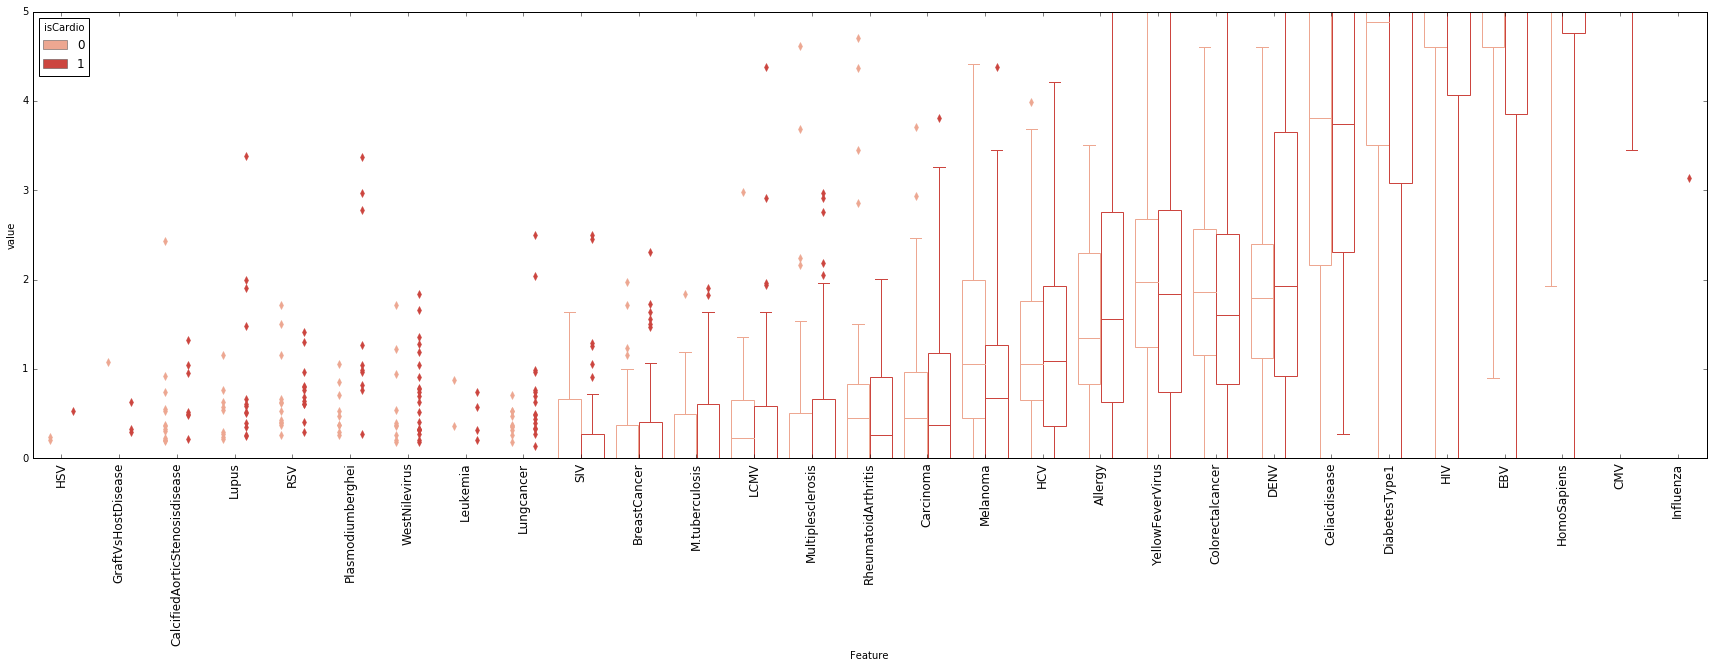

In [128]:
fig,ax=plt.subplots(figsize=(30,8))
cols=[col for col in featureDF_balanced.columns if 'cum' in col or 'isCardio' in col]
col_names=[col.replace('_rel_cum_freq(perc)','') for col in order]
print cols
df=featureDF_balanced[cols]

sns.boxplot(x="Feature", y="value", hue="isCardio",data=featureDF_balanced_melt,order=order,palette='Reds',whis=2)
ax.set_xticklabels(col_names,rotation=90,fontsize='large',alpha=7)


for i,artist in enumerate(ax.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    artist.set_facecolor('None')

    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*6,i*6+6):
        line = ax.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)
        
ax.set_ylim(0,5)
# ax.set_yscale('log')

plt.show()


# sns.boxplot(x="featureDF_balanced2", y="total_bill", hue="smoker",
#              data=tips, palette="Set3")

In [117]:

feature_comparison_balanced_new=pd.DataFrame()
cols=featureDF_balanced2.columns.tolist()
cols.remove('isCardio')
print cols
for n,col in enumerate(cols):
    if n%50==0: print n
    merged=featureDF_balanced2[[col,'isCardio']]
    data={}
    for name,group in merged.groupby('isCardio'):
        data[name]=group[col].dropna().tolist()
    mean_healthy=np.mean(data[0])
    mean_patients=np.mean(data[1])
    s,p=mannwhitneyu(data[0],data[1])
    
    feature_comparison_balanced_new.loc[col,'mean_healthy']=mean_healthy
    feature_comparison_balanced_new.loc[col,'mean_patients']=mean_patients
    feature_comparison_balanced_new.loc[col,'s']=s
    feature_comparison_balanced_new.loc[col,'p']=p

feature_comparison_balanced_new=add_corrected_pValues(feature_comparison_balanced_new,pValueColumn='p' ,
                                                      nTests=len(feature_comparison_balanced_new),FDR=0.1)
feature_comparison_balanced_new=feature_comparison_balanced_new.sort_values(by='p')
print feature_comparison_balanced_new.shape
feature_comparison_balanced_new.head(30)

['AA count_0', 'AA count_1', 'NT count_0', 'NT count_1', 'berger_aa_0', 'berger_aa_1', 'berger_nt_0', 'cdr3Length_max_0', 'cdr3Length_max_1', 'cdr3Length_mean_0', 'cdr3Length_mean_1', 'cdr3Length_std_0', 'cdr3Length_std_1', 'count (templates)_max_0', 'count (templates)_max_1', 'count (templates)_mean_0', 'count (templates)_mean_1', 'count (templates)_std_0', 'count (templates)_std_1', 'd3Deletion_mean_0', 'd3Deletion_mean_1', 'd3Deletion_std_0', 'd3Deletion_std_1', 'd5Deletion_mean_0', 'd5Deletion_mean_1', 'd5Deletion_std_0', 'd5Deletion_std_1', 'frequencyCount (%)_max_0', 'frequencyCount (%)_max_1', 'frequencyCount (%)_mean_0', 'frequencyCount (%)_mean_1', 'frequencyCount (%)_std_0', 'frequencyCount (%)_std_1', 'gc_content_0', 'gc_content_1', 'jDeletion_max_0', 'jDeletion_max_1', 'jDeletion_mean_0', 'jDeletion_mean_1', 'jDeletion_std_0', 'jDeletion_std_1', 'max_nt_per_aa_0', 'max_nt_per_aa_1', 'mean_nt_per_aa_0', 'mean_nt_per_aa_1', 'n1Insertion_max_0', 'n1Insertion_max_1', 'n1Inserti

mean_healthy  mean_patients       s         p  p_Sig_Bonferroni  p_sigFDR=0.1  p_corrPval_DR0.1
n2Insertion_mean_1                                     3.710617       3.805442  1673.0  0.000078                 1             1          0.019381
NT count_0                                          2715.964912    2145.978495  1855.0  0.001041                 0             1          0.095823
CMV_rel_seq_count                                     23.184179      24.964434  1919.5  0.002339                 0             1          0.095823
max_nt_per_aa_0                                        2.789474       2.731183  2053.5  0.002426                 0             1          0.095823
SIV_rel_cum_freq(perc)                                 0.347037       0.201890  2036.0  0.002691                 0             1          0.095823
V12_J02_1                                              0.005556       0.004766  1952.0  0.003440                 0             1          0.095823
V25_1                                                  0.011691       0.010582  1963.0  0.003907                 0             1          0.095823
V09_J02_0                                              0.032774       0.029306  1964.5  0.003975                 0             1          0.095823
SIV_rel_seq_count                                      0.471255       0.269455  2065.0  0.004003                 0             1          0.095823
AA count_1                                         10425.614035    8412.204301  1973.0  0.004380                 0             1          0.095823
NT count_1                                         11022.105263    8876.075269  1975.0  0.004481                 0             1          0.095823
PC1                                                    0.031977       0.026164  1983.0  0.004904                 0             1          0.095823
CalcifiedAorticStenosisdisease_rel_cum_freq(perc)      0.129480       0.054360  2263.0  0.005602                 0             1          0.095823
CalcifiedAorticStenosisdisease_rel_seq_count           0.162062       0.074466  2263.5  0.005655                 0             1          0.095823
Melanoma_rel_cum_freq(perc)                            1.423969       0.887454  2004.0  0.005749                 0             1          0.095823
AA count_0                                           218.333333     177.892473  2005.5  0.006289                 0             1          0.098059
shannon_nt_1                                          12.259219      11.848675  2017.0  0.007125                 0             1          0.098059
jDeletion_max_0                                       23.456140      22.709677  2033.0  0.007259                 0             1          0.098059
shannon_aa_1                                          12.139409      11.736929  2023.0  0.007598                 0             1          0.098059
n2Insertion_mean_0                                     5.230059       5.259865  2026.0  0.007845                 0             1          0.098059
totalAnnotateSeqs                                    141.964912     117.591398  2033.0  0.008445                 0             1          0.099079
top1000clonal_nt_1                                     0.340225       0.387458  2036.0  0.008719                 0             1          0.099079
V25_J02_1                                              0.007625       0.006880  2051.0  0.010190                 0             0          0.110765
V04_J02_0                                              0.041891       0.038838  2060.0  0.011173                 0             0          0.116390
V12_1                                                  0.007491       0.006590  2067.0  0.011994                 0             0          0.119943
top1000clonal_aa_1                                     0.362838       0.406957  2073.0  0.012739                 0             0          0.122489
V29_0                                                  0.026207       0.024174  20

In [118]:
feature_comparison_balanced_new.loc['norm_nAnnotated',:]

mean_healthy           0.013903
mean_patients          0.014266
s                   2415.000000
p                      0.181439
p_Sig_Bonferroni       0.000000
p_sigFDR=0.1           0.000000
p_corrPval_DR0.1       0.359998
Name: norm_nAnnotated, dtype: float64

In [56]:
feature_comparison_balanced_new_seq_count=feature_comparison_balanced_new[feature_comparison_balanced_new.index.str.contains('seq_count')]
# print feature_comparison_balanced_new_seq_count.sum()
feature_comparison_balanced_new_seq_count['same p']=feature_comparison_balanced_new_seq_count['p']
feature_comparison_balanced_new_seq_count=add_corrected_pValues(feature_comparison_balanced_new_seq_count,pValueColumn='same p' ,
                                                      nTests=len(feature_comparison_balanced_new_seq_count),FDR=0.1)
feature_comparison_balanced_new_seq_count


/usr/wisdom/python/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/sbenari/workspace/Microbiome/ShaniBA/GeneralFeaturePhenotypeInteractions/Feature_phenotype_functions.py:1053: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  resultsDF['%s_Sig_Bonferroni' % pValueColumn] = np.where(resultsDF[pValueColumn] < bon_correct_p, 1, 0)
/home/sbenari/workspace/Microbiome/ShaniBA/GeneralFeaturePhenotypeInteractions/Fea

mean_healthy  mean_patients       s         p  p_Sig_Bonferroni  p_sigFDR=0.1  p_corrPval_DR0.1    same p  same p_Sig_Bonferroni  same p_sigFDR=0.1  same p_corrPval_DR0.1
CMV_rel_seq_count                                23.184179      24.964434  1919.5  0.002339                 0             1          0.095440  0.002339                      0                  1               0.043352
SIV_rel_seq_count                                 0.471255       0.269455  2065.0  0.004003                 0             1          0.095440  0.004003                      0                  1               0.043352
CalcifiedAorticStenosisdisease_rel_seq_count      0.162062       0.074466  2263.5  0.005655                 0             1          0.095440  0.005655                      0                  1               0.043352
HTLV_rel_seq_count                                0.307629       0.216688  2304.5  0.041409                 0             0          0.201575  0.041409                      0                  0               0.238100
Melanoma_rel_seq_count                            1.238109       1.046362  2278.0  0.072794                 0             0          0.266555  0.072794                      0                  0               0.255641
LCMV_rel_seq_count                                0.422440       0.335241  2317.5  0.076489                 0             0          0.268433  0.076489                      0                  0               0.255641
Celiacdisease_rel_seq_count                       4.208671       4.613582  2295.5  0.084934                 0             0          0.277308  0.084934                      0                  0               0.255641
HomoSapiens_rel_seq_count                         8.033418       7.586516  2302.0  0.088919                 0             0          0.277308  0.088919                      0                  0               0.255641
Multiplesclerosis_rel_seq_count                   0.488170       0.536364  2370.0  0.117958                 0             0          0.312462  0.117958                      0                  0               0.301447
RheumatoidArthritis_rel_seq_count                 0.722806       0.586406  2372.5  0.132079                 0             0          0.314935  0.132079                      0                  0               0.303783
WestNilevirus_rel_seq_count                       0.130559       0.209504  2483.0  0.180411                 0             0          0.359380  0.180411                      0                  0               0.373587
HIV_rel_seq_count                                 7.037145       6.713122  2438.5  0.206413                 0             0          0.377918  0.206413                      0                  0               0.373587
DiabetesType1_rel_seq_count                       5.271021       5.464728  2446.0  0.214788                 0             0          0.382103  0.214788                      0                  0               0.373587
DENV_rel_seq_count                                2.321601       2.657753  2457.0  0.227401                 0             0          0.382587  0.227401                      0                  0               0.373587
Influenza_rel_seq_count                          28.535096      27.984130  2485.0  0.261452                 0             0          0.402836  0.261452                      0                  0               0.400894
YellowFeverVirus_rel_seq_count                    2.569099       2.379134  2506.5  0.289095                 0             0          0.420962  0.289095                      0                  0               0.415574
M.tuberculosis_rel_seq_count                      0.375291       0.356191  2537.5  0.313653                 0             0          0.436311  0.313653                      0                  0               0.418293
EBV_rel_seq_count                                 6.865878       6.418637  2534.5  0.327360                 0             0          0.44395

In [57]:
feature_comparison_balanced_new_cum_=feature_comparison_balanced_new[feature_comparison_balanced_new.index.str.contains('cum_')]
# print feature_comparison_balanced_new_cum_.sum()
feature_comparison_balanced_new_cum_['same p']=feature_comparison_balanced_new_cum_['p']
feature_comparison_balanced_new_cum_=add_corrected_pValues(feature_comparison_balanced_new_cum_,pValueColumn='same p' ,
                                                      nTests=len(feature_comparison_balanced_new_cum_),FDR=0.1)
feature_comparison_balanced_new_cum_


/usr/wisdom/python/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


mean_healthy  mean_patients       s         p  p_Sig_Bonferroni  p_sigFDR=0.1  p_corrPval_DR0.1    same p  same p_Sig_Bonferroni  same p_sigFDR=0.1  same p_corrPval_DR0.1
SIV_rel_cum_freq(perc)                                 0.347037       0.201890  2036.0  0.002691                 0             1          0.095440  0.002691                      0                  1               0.055577
CalcifiedAorticStenosisdisease_rel_cum_freq(perc)      0.129480       0.054360  2263.0  0.005602                 0             1          0.095440  0.005602                      0                  1               0.055577
Melanoma_rel_cum_freq(perc)                            1.423969       0.887454  2004.0  0.005749                 0             1          0.095440  0.005749                      0                  1               0.055577
CMV_rel_cum_freq(perc)                                22.751219      26.684056  2107.0  0.017757                 0             0          0.138175  0.017757                      0                  0               0.128742
LCMV_rel_cum_freq(perc)                                0.541508       0.359325  2279.5  0.055647                 0             0          0.230937  0.055647                      0                  0               0.279864
Colorectalcancer_rel_cum_freq(perc)                    2.108495       1.947650  2244.0  0.057903                 0             0          0.232546  0.057903                      0                  0               0.279864
RSV_rel_cum_freq(perc)                                 0.152052       0.099813  2452.5  0.115420                 0             0          0.312462  0.115420                      0                  0               0.406972
RheumatoidArthritis_rel_cum_freq(perc)                 0.890150       0.506666  2374.0  0.133378                 0             0          0.314935  0.133378                      0                  0               0.406972
HSV_rel_cum_freq(perc)                                 0.007646       0.005733  2587.0  0.157241                 0             0          0.337120  0.157241                      0                  0               0.406972
EBV_rel_cum_freq(perc)                                 8.315678       7.343662  2397.0  0.163644                 0             0          0.337120  0.163644                      0                  0               0.406972
YellowFeverVirus_rel_cum_freq(perc)                    2.149655       1.905027  2402.0  0.168295                 0             0          0.337946  0.168295                      0                  0               0.406972
HomoSapiens_rel_cum_freq(perc)                         8.462741       7.767143  2427.0  0.193950                 0             0          0.374751  0.193950                      0                  0               0.406972
WestNilevirus_rel_cum_freq(perc)                       0.109067       0.169873  2499.0  0.204333                 0             0          0.376880  0.204333                      0                  0               0.406972
DENV_rel_cum_freq(perc)                                2.094601       2.699401  2448.0  0.217026                 0             0          0.382103  0.217026                      0                  0               0.406972
Multiplesclerosis_rel_cum_freq(perc)                   0.452659       0.449494  2468.0  0.220528                 0             0          0.382587  0.220528                      0                  0               0.406972
HIV_rel_cum_freq(perc)                                 7.366913       6.600285  2454.5  0.224536                 0             0          0.382587  0.224536                      0                  0               0.406972
Plasmodiumberghei_rel_cum_freq(perc)                   0.086100       0.164059  2547.0  0.245048                 0             0          0.394142  0.245048                      0                  0               0.418023
DiabetesType1_rel_cum_freq(perc)                       

In [12]:
feature_comparison_balanced_new_cum=feature_comparison_balanced_new[feature_comparison_balanced_new.index.str.contains('cum_')]
print feature_comparison_balanced_new_cum.sum()
feature_comparison_balanced_new_cum.head()

mean_healthy           99.508787
mean_patients         102.455278
s                   71048.500000
p                       6.719606
p_Sig_Bonferroni        0.000000
p_sigFDR=0.1            0.000000
p_corrPval_DR0.1       11.009207
dtype: float64


mean_healthy  mean_patients       s         p  p_Sig_Bonferroni  p_sigFDR=0.1  p_corrPval_DR0.1
SIV_rel_cum_freq(perc)                                 0.347037       0.201890  2036.0  0.002691                 0             0          0.146609
CalcifiedAorticStenosisdisease_rel_cum_freq(perc)      0.129480       0.054360  2263.0  0.005602                 0             0          0.146609
Melanoma_rel_cum_freq(perc)                            1.423969       0.887454  2004.0  0.005749                 0             0          0.146609
CMV_rel_cum_freq(perc)                                22.751219      26.684056  2107.0  0.017757                 0             0          0.185771
LCMV_rel_cum_freq(perc)                                0.541508       0.359325  2279.5  0.055647                 0             0          0.291079

## compare distribution of top 5 annotations:

In [6]:
cols=[x for x in featureDF_balanced.columns if 'cum_' in x]
cols

[u'Allergy_rel_cum_freq(perc)',
 u'BreastCancer_rel_cum_freq(perc)',
 u'CMV_rel_cum_freq(perc)',
 u'CalcifiedAorticStenosisdisease_rel_cum_freq(perc)',
 u'Carcinoma_rel_cum_freq(perc)',
 u'Celiacdisease_rel_cum_freq(perc)',
 u'Colorectalcancer_rel_cum_freq(perc)',
 u'DENV_rel_cum_freq(perc)',
 u'DiabetesType1_rel_cum_freq(perc)',
 u'EBV_rel_cum_freq(perc)',
 u'GraftVsHostDisease_rel_cum_freq(perc)',
 u'HCV_rel_cum_freq(perc)',
 u'HIV_rel_cum_freq(perc)',
 u'HSV_rel_cum_freq(perc)',
 u'HomoSapiens_rel_cum_freq(perc)',
 u'Influenza_rel_cum_freq(perc)',
 u'LCMV_rel_cum_freq(perc)',
 u'Leukemia_rel_cum_freq(perc)',
 u'Lungcancer_rel_cum_freq(perc)',
 u'Lupus_rel_cum_freq(perc)',
 u'M.tuberculosis_rel_cum_freq(perc)',
 u'Melanoma_rel_cum_freq(perc)',
 u'Multiplesclerosis_rel_cum_freq(perc)',
 u'Plasmodiumberghei_rel_cum_freq(perc)',
 u'RSV_rel_cum_freq(perc)',
 u'RheumatoidArthritis_rel_cum_freq(perc)',
 u'SIV_rel_cum_freq(perc)',
 u'WestNilevirus_rel_cum_freq(perc)',
 u'YellowFeverVirus_rel_cum_freq(perc)']

In [8]:
cum_freq_balanced=featureDF_balanced[cols]
cum_freq_balanced_PNP=cum_freq_balanced.loc[PNP530_balancedAge_males,:]
cum_freq_balanced_Cardio=cum_freq_balanced.loc[Cardio126_balancedAge_males,:]

In [52]:
word='cum_'
threshold=0.5


cols=[x for x in featureDF_balanced.columns if word in x]
cum_freq_balanced=featureDF_balanced[cols]
cum_freq_balanced_PNP=cum_freq_balanced.loc[PNP530_balancedAge_males,:]
cum_freq_balanced_Cardio=cum_freq_balanced.loc[Cardio126_balancedAge_males,:]



sum_df=pd.DataFrame()
from scipy.stats import chi2_contingency

for n,item in enumerate([('PNP',cum_freq_balanced_PNP),('Cardio126',cum_freq_balanced_Cardio)]):
    print '**********%s***********' %n
    df=item[1]
    name=item[0]
    topFeatures= pd.DataFrame(df.mean()[df.mean()>threshold].rename(name))
    sum_df=pd.merge(sum_df,topFeatures,how='outer',left_index=True,right_index=True)
    print topFeatures.sum().sum()
    sum_df.loc['other',name]=100 - topFeatures.sum().sum()
    sum_df= sum_df.fillna(0)
chi2,p,dof,expected = chi2_contingency(sum_df.T)
sum_df

print p
    

**********0***********
97.49075307568678
**********1***********
99.70652547247576
0.9996977442025536


In [53]:
word='seq_count'
threshold=0.5

cols=[x for x in featureDF_balanced.columns if word in x]
cum_freq_balanced=featureDF_balanced[cols]
cum_freq_balanced_PNP=cum_freq_balanced.loc[PNP530_balancedAge_males,:]
cum_freq_balanced_Cardio=cum_freq_balanced.loc[Cardio126_balancedAge_males,:]



sum_df=pd.DataFrame()
from scipy.stats import chi2_contingency

for n,item in enumerate([('PNP',cum_freq_balanced_PNP),('Cardio126',cum_freq_balanced_Cardio)]):
    print '**********%s***********' %n
    df=item[1]
    name=item[0]
    topFeatures= pd.DataFrame(df.mean()[df.mean()>threshold].rename(name))
    sum_df=pd.merge(sum_df,topFeatures,how='outer',left_index=True,right_index=True)
    print topFeatures.sum().sum()
    sum_df.loc['other',name]=100 - topFeatures.sum().sum()
    sum_df= sum_df.fillna(0)
chi2,p,dof,expected = chi2_contingency(sum_df.T)
sum_df

print p
    

**********0***********
96.40736491241687
**********1***********
97.20440525947662
0.9999999848859716
